In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


In [2]:
riquitos_forbes = pd.read_csv('datasets usados/all_billionaires_1997_2023.csv')

In [3]:
# Realizamos análisis preliminar, cantidad de filas y columnas
riquitos_forbes.shape

(31732, 19)

In [4]:
# Tipos de columnas, cantidad de registros, información general
riquitos_forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31732 entries, 0 to 31731
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      31732 non-null  int64  
 1   month                     31732 non-null  int64  
 2   rank                      31714 non-null  float64
 3   net_worth                 31732 non-null  object 
 4   last_name                 28043 non-null  object 
 5   first_name                27985 non-null  object 
 6   full_name                 31732 non-null  object 
 7   birth_date                27328 non-null  object 
 8   age                       31057 non-null  float64
 9   gender                    27903 non-null  object 
 10  country_of_citizenship    31723 non-null  object 
 11  country_of_residence      31030 non-null  object 
 12  city_of_residence         30797 non-null  object 
 13  business_category         25889 non-null  object 
 14  busine

In [5]:
# Descripción variables
riquitos_forbes.describe(include = 'all')

year         month          rank net_worth last_name  \
count   31732.000000  31732.000000  31714.000000     31732     28043   
unique           NaN           NaN           NaN       541      2593   
top              NaN           NaN           NaN     1.1 B      Wang   
freq             NaN           NaN           NaN      1738       373   
mean     2015.755956      3.364143    903.961374       NaN       NaN   
std         5.644194      0.604035    645.565108       NaN       NaN   
min      1997.000000      2.000000      0.000000       NaN       NaN   
25%      2012.000000      3.000000    366.000000       NaN       NaN   
50%      2017.000000      3.000000    782.000000       NaN       NaN   
75%      2021.000000      4.000000   1362.000000       NaN       NaN   
max      2023.000000      7.000000   2674.000000       NaN       NaN   

       first_name      full_name  birth_date           age gender  \
count       27985          31732       27328  31057.000000  27903   
unique       2924           4982        3113           NaN      2   
top          John  Robert Miller  1962-01-01           NaN   Male   
freq          507             27         167           NaN  24868   
mean          NaN            NaN         NaN     62.835077    NaN   
std           NaN            NaN         NaN     14.175068    NaN   
min           NaN            NaN         NaN      0.000000    NaN   
25%           NaN            NaN         NaN     54.000000    NaN   
50%           NaN            NaN         NaN     63.000000    NaN   
75%           NaN            NaN         NaN     73.000000    NaN   
max           NaN            NaN         NaN    101.000000    NaN   

       country_of_citizenship country_of_residence city_of_residence  \
count                   31723                31030             30797   
unique                     88                   94              1138   
top             United States        United States          New York   
freq                    10142                10058              1368   
mean                      NaN                  NaN               NaN   
std                       NaN                  NaN               NaN   
min                       NaN                  NaN               NaN   
25%                       NaN                  NaN               NaN   
50%                       NaN                  NaN               NaN   
75%                       NaN                  NaN               NaN   
max                       NaN                  NaN               NaN   

       business_category business_industries organization_name  \
count              25889               30742              4388   
unique                41                  67               567   
top           Technology   ['Manufacturing']          Facebook   
freq                2610                2818                39   
mean                 NaN                 NaN               NaN   
std                  NaN                 NaN               NaN   
min                  NaN                 NaN               NaN   
25%                  NaN                 NaN               NaN   
50%                  NaN                 NaN               NaN   
75%                  NaN                 NaN               NaN   
max                  NaN                 NaN               NaN   

       position_in_organization self_made wealth_status  
count                      4692     28043         24586  
unique                      164         2             4  
top                Entrepreneur      True     Increased  
freq                        561     17623         12367  
mean                        NaN       NaN           NaN  
std                         NaN       NaN           NaN  
min                         NaN       NaN           NaN  
25%                         NaN       NaN           NaN  
50%                         NaN       NaN           NaN  
75%                         NaN       NaN           NaN  
max                       

In [6]:
# Y PRIMEROS REGISTROS
riquitos_forbes.head()

year  month  rank net_worth     last_name            first_name  \
0  1997      7   NaN     2.0 B  Sophonpanich                Chatri   
1  1997      7   NaN     1.8 B     Adulyadej         King Bhumibol   
2  1998      7   NaN     3.3 B         Safra                Edmond   
3  1999      7   NaN     1.0 B       Hinduja  Srichand, Gopichand,   
4  1999      7   NaN     7.1 B       Schwarz                Dieter   

                      full_name  birth_date   age gender  \
0  Chatri Sophonpanich & family  1934-02-28  73.0   Male   
1       King Bhumibol Adulyadej  1927-12-05  69.0   Male   
2                  Edmond Safra  1932-08-06  65.0   Male   
3  Srichand & Gopichand Hinduja  1935-11-28   NaN    NaN   
4                Dieter Schwarz  1939-09-24  59.0   Male   

  country_of_citizenship country_of_residence city_of_residence  \
0               Thailand             Thailand           Bangkok   
1               Thailand                  NaN               NaN   
2                Lebanon              Lebanon               NaN   
3                  India       United Kingdom            London   
4                Germany              Germany        Neckarsulm   

         business_category          business_industries organization_name  \
0  Finance and Investments  ['Finance and Investments']               NaN   
1                      NaN                          NaN               NaN   
2                      NaN                          NaN               NaN   
3                      NaN                          NaN               NaN   
4         Fashion & Retail         ['Fashion & Retail']               NaN   

  position_in_organization self_made wealth_status  
0                      NaN     False           NaN  
1                      NaN     False           NaN  
2                      NaN      True           NaN  
3                      NaN     False           NaN  
4                      NaN      True           NaN

In [7]:
# EMPEZAMOS CON LAS MODIFICACIONES. Vemos que tenemos registros desde 1997. Dado que en el otro dataset grande y el de PIB
# en los que nos basaremos comienzan en 2012, decidimos prescindir EN UN PRIMER MOMENTO, de todos los registros anteriores a dicho año.
riquitos_forbes_13_23 = riquitos_forbes[riquitos_forbes.year > 2011]

In [8]:
riquitos_forbes_13_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      24496 non-null  int64  
 1   month                     24496 non-null  int64  
 2   rank                      24496 non-null  float64
 3   net_worth                 24496 non-null  object 
 4   last_name                 24496 non-null  object 
 5   first_name                24442 non-null  object 
 6   full_name                 24496 non-null  object 
 7   birth_date                23853 non-null  object 
 8   age                       23854 non-null  float64
 9   gender                    24380 non-null  object 
 10  country_of_citizenship    24496 non-null  object 
 11  country_of_residence      24087 non-null  object 
 12  city_of_residence         23950 non-null  object 
 13  business_category         24173 non-null  object 
 14  bus

# **TABLA DE VARIABLES**
* YEAR, año de recogida del dato en forbes
* MONTH, mes de recogida(poco útil)
* RANK,  Cada individuo en la lista tiene asignado un número de rango específico según el valor de su patrimonio neto en comparación con los demás en la misma lista.
* NET_WORTH, PATRIMONIO NETO, ACTIVOS-PASIVOS
* LAST NAME,  APELLIDO
* FIRTS NAME, NOMBRE 
* FULL NAME,  NOMBRE Y APELLIDO    
* BIRTH DAY, dia de nacimiento
* AGE, edad
* GENDER, genero
* COUNTRY_OF_CITIZEN , pais de ciudadania
* COUNTRY_OF_RESIDENCE, pais de residencia
* CITY OF RESIDENCE , ciudad de residencia
* BUSSINESS _CATEGORY, categoría de negocio (TECNOLOGIA, FINANZAS..) MAS GENERAL
* BUSINESS_INDUSTRIES, subdivisiones más detalladas dentro de una categoría de negocio. Por ejemplo, si la categoría de negocio es "Tecnología", las industrias de negocios podrían incluir software, hardware, servicios en la nube, redes sociales, etc.
* SELF_MADE, "Self-made" se refiere a personas que han acumulado su riqueza y éxito por sus propios esfuerzos y habilidades, en lugar de heredarla
* ORGANIZATION_NAME, nombre de la organizacion,(pocos registros, la desecharemos)       
* POSITION_IN_ORGANIZATION, position en la organizacion (pocos registros, la desecharemos)
* WEALTH STATUS , SI LA POSICION EN LA LISTA HA SUBIDO DEL AÑO ANTERIOR A ESTE, SI HA APARECIDO COMO NUEVO...

In [9]:
# y empezamos a eliminar columnas, tras una primera revision vemos que full name (QUE ADEMAS NO TIENE NINGUN NULO) es 
# la unión de last name y first name, POR LO QUE ESTAS DOS SOBRAN. Tambien eliminamos MONTH, que no usaremos.
# También eliminaremos aquellas con mas del 50% de nulos, ORGANIZATION_NAME Y POSITION_IN_ORGANIZATION
riquitos_forbes_13_23.drop(['last_name','first_name','organization_name','position_in_organization','month'],axis=1, inplace = True)

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\1610247667.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
riquitos_forbes_13_23.info() # y tenemos que empezar a estudiar las columnas con nulos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24496 non-null  int64  
 1   rank                    24496 non-null  float64
 2   net_worth               24496 non-null  object 
 3   full_name               24496 non-null  object 
 4   birth_date              23853 non-null  object 
 5   age                     23854 non-null  float64
 6   gender                  24380 non-null  object 
 7   country_of_citizenship  24496 non-null  object 
 8   country_of_residence    24087 non-null  object 
 9   city_of_residence       23950 non-null  object 
 10  business_category       24173 non-null  object 
 11  business_industries     24492 non-null  object 
 12  self_made               24496 non-null  object 
 13  wealth_status           21568 non-null  object 
dtypes: float64(2), int64(1), object(11)

In [11]:
# empezamos con birth date, hacemos un dataframe solo con sus nulos, para estudiarlos
filtro_nulos_birth_date = riquitos_forbes_13_23['birth_date'].isnull()
nulos_birth = riquitos_forbes_13_23[filtro_nulos_birth_date]

In [12]:
nulos_birth.shape # tiene 614 nulos, no son muchisimos

(643, 14)

In [13]:
nulos_birth

year    rank net_worth                       full_name birth_date  \
7262   2012    27.0    18.3 B  Thomas & Raymond Kwok & family        NaN   
7402   2012   166.0     6.0 B  Paolo & Gianfelice Mario Rocca        NaN   
7434   2012   199.0     5.1 B            Alejandro Bulgheroni        NaN   
7450   2012   205.0     5.0 B                Yoovidhya Family        NaN   
7453   2012   216.0     4.9 B              Hank & Doug Meijer        NaN   
...     ...     ...       ...                             ...        ...   
31545  2023  2405.0     1.1 B                   Michaela Herz        NaN   
31642  2023  2540.0     1.0 B                  Chang Kuo-Ming        NaN   
31695  2023  2540.0     1.0 B               Gabriella Meister        NaN   
31701  2023  2540.0     1.0 B                    Réal Plourde        NaN   
31717  2023  2540.0     1.0 B          Wang Jianfeng & family        NaN   

        age  gender country_of_citizenship country_of_residence  \
7262    0.0    Male              Hong Kong            Hong Kong   
7402    NaN    Male                  Italy            Argentina   
7434    NaN    Male              Argentina            Argentina   
7450   80.0    Male               Thailand                  NaN   
7453    NaN     NaN          United States        United States   
...     ...     ...                    ...                  ...   
31545   NaN  Female                Germany              Germany   
31642   NaN    Male                 Taiwan               Taiwan   
31695   NaN  Female                Germany              Germany   
31701   NaN    Male                 Canada               Canada   
31717  53.0    Male                  China                China   

              city_of_residence      business_category  \
7262                  Hong Kong                    NaN   
7402   San Isidro, Buenos Aires        Metals & Mining   
7434               Buenos Aires                 Energy   
7450                        NaN      Food and Beverage   
7453               Grand Rapids     Fashion and Retail   
...                         ...                    ...   
31545                   Hamburg  Finance & Investments   
31642                    Taipei              Logistics   
31695         Landsberg am Lech          Manufacturing   
31701                 Westmount       Fashion & Retail   
31717                    Ningbo             Automotive   

             business_industries self_made  wealth_status  
7262             ['Real Estate']     False      Decreased  
7402         ['Metals & Mining']     False            NaN  
7434                  ['Energy']     False  Remained Even  
7450       ['Food and Beverage']      True  Remained Even  
7453      ['Fashion and Retail']     False            NaN  
...                          ...       ...            ...  
31545  ['Finance & Investments']     False  Remained Even  
31642              ['Logistics']     False      Decreased  
31695          ['Manufacturing']     False      Decreased  
31701       ['Fashion & Retail']      True            NaN  
31717             ['Automotive']      True      Decreased  

[643 rows x 14 columns]

In [14]:
# NOTA, HAYA VARIOS DE LOS PRIMEROS QUE PARECEN NOMBRES DE ASOCIACIONES, POR LO QUE TIENE SENTIDO QUE NO TENGA EDAD NI FECHA DE CUMPLEAÑOS, como Robert & Philip Ng O Hinduja Brothers
# Vamos a hacer revisiones, por ejemplo de uno de los primeros nulos,Dirce Navarro De Camargo & family
riquitos_forbes_13_23[riquitos_forbes_13_23.full_name == 'Dirce Navarro De Camargo & family'] # solo aparece una vez, harems otra prueba

year  rank net_worth                          full_name birth_date  age  \
8548  2013  87.0    11.5 B  Dirce Navarro De Camargo & family        NaN  NaN   

      gender country_of_citizenship country_of_residence city_of_residence  \
8548  Female                 Brazil                  NaN               NaN   

               business_category             business_industries self_made  \
8548  Construction & Engineering  ['Construction & Engineering']     False   

         wealth_status  
8548  Returned to List

In [15]:
riquitos_forbes_13_23[riquitos_forbes_13_23.full_name == 'Thomas & Raymond Kwok'] 
# este si aparece todos los años hasta 2018, pero parece una empresa familiar,de ahi que no tenga fecha de nacimiento ni edad

year  rank net_worth              full_name birth_date  age gender  \
8489   2013  26.0    20.0 B  Thomas & Raymond Kwok        NaN  NaN   Male   
9973   2014  86.0    12.6 B  Thomas & Raymond Kwok        NaN  NaN   Male   
11590  2015  58.0    15.9 B  Thomas & Raymond Kwok        NaN  NaN   Male   
13427  2016  68.0    13.0 B  Thomas & Raymond Kwok        NaN  NaN   Male   
15238  2017  69.0    15.0 B  Thomas & Raymond Kwok        NaN  NaN   Male   
17289  2018  77.0    16.5 B  Thomas & Raymond Kwok        NaN  NaN   Male   

      country_of_citizenship country_of_residence city_of_residence  \
8489               Hong Kong            Hong Kong         Hong Kong   
9973               Hong Kong            Hong Kong         Hong Kong   
11590              Hong Kong            Hong Kong         Hong Kong   
13427              Hong Kong            Hong Kong         Hong Kong   
15238              Hong Kong            Hong Kong         Hong Kong   
17289              Hong Kong            Hong Kong         Hong Kong   

      business_category business_industries self_made wealth_status  
8489        Real Estate     ['Real Estate']     False     Increased  
9973        Real Estate     ['Real Estate']     False     Decreased  
11590       Real Estate     ['Real Estate']     False     Increased  
13427       Real Estate     ['Real Estate']     False     Decreased  
15238       Real Estate     ['Real Estate']     False     Increased  
17289       Real Estate     ['Real Estate']     False     Increased

In [16]:
riquitos_forbes_13_23[riquitos_forbes_13_23.full_name == 'Gabriella Meister'] 
# Apareció de vuelta en la lista en 2021, no tenemos más información.

year    rank net_worth          full_name birth_date  age  gender  \
24855  2021  1174.0     2.7 B  Gabriella Meister        NaN  NaN  Female   
28942  2022  2448.0     1.1 B  Gabriella Meister        NaN  NaN  Female   
31695  2023  2540.0     1.0 B  Gabriella Meister        NaN  NaN  Female   

      country_of_citizenship country_of_residence  city_of_residence  \
24855                Germany              Germany  Landsberg am Lech   
28942                Germany              Germany  Landsberg am Lech   
31695                Germany              Germany  Landsberg am Lech   

      business_category business_industries self_made     wealth_status  
24855     Manufacturing   ['Manufacturing']     False  Returned to List  
28942     Manufacturing   ['Manufacturing']     False               NaN  
31695     Manufacturing   ['Manufacturing']     False         Decreased

In [17]:
riquitos_forbes_13_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24496 non-null  int64  
 1   rank                    24496 non-null  float64
 2   net_worth               24496 non-null  object 
 3   full_name               24496 non-null  object 
 4   birth_date              23853 non-null  object 
 5   age                     23854 non-null  float64
 6   gender                  24380 non-null  object 
 7   country_of_citizenship  24496 non-null  object 
 8   country_of_residence    24087 non-null  object 
 9   city_of_residence       23950 non-null  object 
 10  business_category       24173 non-null  object 
 11  business_industries     24492 non-null  object 
 12  self_made               24496 non-null  object 
 13  wealth_status           21568 non-null  object 
dtypes: float64(2), int64(1), object(11)

In [18]:
# TRAS EL ESTUDIO, NO CREO QUE FUERA ADECUADO ELIMINARLOS DIRECTAMENTE, PUES HE VISTO EN ESTAS 4 PRUEBAS UNA PAUTA, QUE LOS QUE TIENEN BIRTH DATE TAMBIEN TIENEN NULOS LA COLUMNA AGE (coinciden ambas columnas, OBVIAMENTE)
# Y QUE TODOS HAN SIDO FORTUNAS HEREDADAS, ME PUEDEN SERVIR PARA MIS HIPOTESIS, DE MODO QUE SUSTITUIMOS LOS NAN POR EL VALOR DESCONOCIDO EN COLUMNA AGE Y BIRTH_DAY
riquitos_forbes_13_23['birth_date'].fillna('DESCONOCIDO',inplace=True)

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\2462281052.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# y ahora con age
riquitos_forbes_13_23['age'].fillna('DESCONOCIDO',inplace=True)

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\3024711844.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
riquitos_forbes_13_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24496 non-null  int64  
 1   rank                    24496 non-null  float64
 2   net_worth               24496 non-null  object 
 3   full_name               24496 non-null  object 
 4   birth_date              24496 non-null  object 
 5   age                     24496 non-null  object 
 6   gender                  24380 non-null  object 
 7   country_of_citizenship  24496 non-null  object 
 8   country_of_residence    24087 non-null  object 
 9   city_of_residence       23950 non-null  object 
 10  business_category       24173 non-null  object 
 11  business_industries     24492 non-null  object 
 12  self_made               24496 non-null  object 
 13  wealth_status           21568 non-null  object 
dtypes: float64(1), int64(1), object(12)

In [21]:
# Pasamos a GENDER
filtro_nulos_gender = riquitos_forbes_13_23['gender'].isnull()
nulos_gender = riquitos_forbes_13_23[filtro_nulos_gender]

In [22]:
nulos_gender # Vemos que, como en la edad y el dia de nacimiento, los generos indeterminados corresponden en un análisis preliminar a nombres de asociaciones.
# Sustituimos por INDETERMINADO el género(a la hora de hacer los análisis y gráficas, si vemos que los datos son raros eliminaremos las filas correspondientes)
riquitos_forbes_13_23['gender'].fillna('INDETERMINADO',inplace=True)

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\1445197644.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
riquitos_forbes_13_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24496 non-null  int64  
 1   rank                    24496 non-null  float64
 2   net_worth               24496 non-null  object 
 3   full_name               24496 non-null  object 
 4   birth_date              24496 non-null  object 
 5   age                     24496 non-null  object 
 6   gender                  24496 non-null  object 
 7   country_of_citizenship  24496 non-null  object 
 8   country_of_residence    24087 non-null  object 
 9   city_of_residence       23950 non-null  object 
 10  business_category       24173 non-null  object 
 11  business_industries     24492 non-null  object 
 12  self_made               24496 non-null  object 
 13  wealth_status           21568 non-null  object 
dtypes: float64(1), int64(1), object(12)

In [24]:
# Para seguir preparando solo los datos que necesitamos, tomamos una nueva decision. Tenemos 3 columnas country_of_citizenship,country_of_residence y city_of_residence.
# No usaremos las tres para nuestra hipotesis, de modo que hacemos una rapida revision para ver cúal de ellos nos puede aportar información más útil
# Buscamos duplicados
registros_iguales = riquitos_forbes_13_23[riquitos_forbes_13_23.duplicated(subset=['country_of_citizenship', 'country_of_residence'], keep=False)]

In [25]:
registros_iguales.shape  # (23239, 14)
# Casi todos los registros son iguales, de modo que desechamos el país de residencia, pues para mis hipótesis usaré el de nacimiento,'country_of_citizenship'
riquitos_forbes_13_23.drop('country_of_residence',axis = 1,inplace=True)
# También decidimos eliminar la ciudad de residencia, pues ninguna de nuestras hipótesis reqiere de esta variable
riquitos_forbes_13_23.drop('city_of_residence',axis = 1,inplace=True)

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\1940928134.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\1940928134.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
riquitos_forbes_13_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24496 non-null  int64  
 1   rank                    24496 non-null  float64
 2   net_worth               24496 non-null  object 
 3   full_name               24496 non-null  object 
 4   birth_date              24496 non-null  object 
 5   age                     24496 non-null  object 
 6   gender                  24496 non-null  object 
 7   country_of_citizenship  24496 non-null  object 
 8   business_category       24173 non-null  object 
 9   business_industries     24492 non-null  object 
 10  self_made               24496 non-null  object 
 11  wealth_status           21568 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.4+ MB


In [27]:
# NOS QUEDAN 3 COLUMNAS CON NULOS, BUSINESS_CATEGORY, BUSINESS_INDUSTRIES Y WEALTH STATUS. Las dos primeras solo tienen tres registros nulos.
filtro_nulos_BUSINESS_CATEGORY_industries = riquitos_forbes_13_23['business_category'].isnull()
nulos_BUSINESS_CATEGORY_industries = riquitos_forbes_13_23[filtro_nulos_BUSINESS_CATEGORY_industries]


In [28]:
nulos_BUSINESS_CATEGORY_industries 
# comprobamos que los 3 registros nulos DE AMBOS SE COMPARTEN, Laurene Powell Jobs & family. Revisamos solo este en dataframe original.

year    rank net_worth                     full_name  birth_date   age  \
7236   2012     1.0    69.0 B     Carlos Slim Helu & family  1940-01-28  72.0   
7239   2012     4.0    41.0 B               Bernard Arnault  1949-03-05  63.0   
7242   2012     7.0    30.0 B                  Eike Batista  1956-11-03  55.0   
7245   2012    10.0    25.4 B                 Karl Albrecht  1920-02-20  92.0   
7254   2012    19.0    22.3 B                 Mukesh Ambani  1957-04-19  54.0   
...     ...     ...       ...                           ...         ...   ...   
8458   2012  1153.0     1.0 B                   Wu Chung-Yi  1959-01-01  53.0   
8459   2012  1153.0     1.0 B           Xu Jingren & family  1944-10-01  67.0   
15210  2017    40.0    20.0 B  Laurene Powell Jobs & family  1963-11-06  53.0   
17270  2018    58.0    18.8 B  Laurene Powell Jobs & family  1963-11-06  54.0   
19475  2019    54.0    18.6 B  Laurene Powell Jobs & family  1963-11-06  55.0   

       gender country_of_citizenship business_category  \
7236     Male                 Mexico               NaN   
7239     Male                 France               NaN   
7242     Male                 Brazil               NaN   
7245     Male                Germany               NaN   
7254     Male                  India               NaN   
...       ...                    ...               ...   
8458     Male                 Taiwan               NaN   
8459     Male                  China               NaN   
15210  Female          United States               NaN   
17270  Female          United States               NaN   
19475  Female          United States               NaN   

          business_industries self_made  wealth_status  
7236              ['Telecom']      True      Decreased  
7239   ['Fashion and Retail']     False  Remained Even  
7242               ['Energy']      True  Remained Even  
7245   ['Fashion and Retail']      True      Decreased  
7254               ['Energy']     False      Decreased  
...                       ...       ...            ...  
8458        ['Manufacturing']     False            NaN  
8459          ['Health care']      True      Decreased  
15210                     NaN     False      Increased  
17270                     NaN     False      Decreased  
19475                     NaN     False      Decreased  

[323 rows x 12 columns]

In [29]:
riquitos_forbes_13_23[riquitos_forbes_13_23['full_name'] == 'Laurene Powell Jobs & family']
# y vemos que en otros años, están rellenos ambos campos con TECHNOLOGY, DE MODO QUE LOS RELLENAMOS CON ESE DATO
riquitos_forbes_13_23[['business_category', 'business_industries']] = riquitos_forbes_13_23[['business_category', 'business_industries']].fillna('Technology')


C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\1251779991.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
riquitos_forbes_13_23.info() # y ya nos queda wealth_status

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24496 non-null  int64  
 1   rank                    24496 non-null  float64
 2   net_worth               24496 non-null  object 
 3   full_name               24496 non-null  object 
 4   birth_date              24496 non-null  object 
 5   age                     24496 non-null  object 
 6   gender                  24496 non-null  object 
 7   country_of_citizenship  24496 non-null  object 
 8   business_category       24496 non-null  object 
 9   business_industries     24496 non-null  object 
 10  self_made               24496 non-null  object 
 11  wealth_status           21568 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.4+ MB


In [31]:
riquitos_forbes_13_23.wealth_status.value_counts() # vemos que hay cuatro estados en la salud financiera, incrementa, disminuye, se mantiene o vuelve a la lista

Increased           10639
Decreased            7746
Remained Even        2366
Returned to List      817
Name: wealth_status, dtype: int64

In [32]:
filtro_nulos_wealth_status  = riquitos_forbes_13_23['wealth_status'].isnull()
nulos_wealth_status  = riquitos_forbes_13_23[filtro_nulos_wealth_status]

In [33]:
nulos_wealth_status.shape

(2928, 12)

In [34]:
nulos_wealth_status

year    rank net_worth                       full_name   birth_date  \
7332   2012    97.0     9.5 B  Alejandro Santo Domingo Davila   1977-02-13   
7335   2012   100.0     9.0 B    Laurene Powell Jobs & family   1963-11-06   
7360   2012   125.0     7.3 B                 Ivan Glasenberg   1957-01-07   
7399   2012   161.0     6.2 B                       Idan Ofer   1955-10-02   
7402   2012   166.0     6.0 B  Paolo & Gianfelice Mario Rocca  DESCONOCIDO   
...     ...     ...       ...                             ...          ...   
31711  2023  2540.0     1.0 B         Haryanto Tjiptodihardjo   1963-04-30   
31712  2023  2540.0     1.0 B             David Tran & family   1945-11-19   
31713  2023  2540.0     1.0 B                 Kenzo Tsujimoto   1940-12-15   
31721  2023  2540.0     1.0 B                      Toto Wolff   1972-01-12   
31723  2023  2540.0     1.0 B          Xie Bingzheng & family   1969-01-01   

               age         gender country_of_citizenship  \
7332          35.0  INDETERMINADO               Colombia   
7335          48.0         Female          United States   
7360          55.0           Male              Australia   
7399          56.0           Male                 Israel   
7402   DESCONOCIDO           Male                  Italy   
...            ...            ...                    ...   
31711         59.0           Male              Indonesia   
31712         77.0           Male          United States   
31713         82.0           Male                  Japan   
31721         51.0           Male                Austria   
31723         54.0           Male                  China   

           business_category        business_industries self_made  \
7332              Technology      ['Food and Beverage']     False   
7335              Technology             ['Technology']     False   
7360         Metals & Mining        ['Metals & Mining']      True   
7399             Diversified            ['Diversified']     False   
7402         Metals & Mining        ['Metals & Mining']     False   
...                      ...                        ...       ...   
31711          Manufacturing          ['Manufacturing']     False   
31712        Food & Beverage        ['Food & Beverage']      True   
31713  Media & Entertainment  ['Media & Entertainment']      True   
31721                 Sports                 ['Sports']      True   
31723       Fashion & Retail       ['Fashion & Retail']      True   

      wealth_status  
7332            NaN  
7335            NaN  
7360            NaN  
7399            NaN  
7402            NaN  
...             ...  
31711           NaN  
31712           NaN  
31713           NaN  
31721           NaN  
31723           NaN  

[2928 rows x 12 columns]

In [35]:
# NOTA: HEMOS PROBADO UN METODO PARA VER TODAS LAS FILAS Y COLUMNAS EN PANDAS, PARA COMPROBAR UNA TEORIA
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
# PERO EN CUANTO TERMINES DE COMPROBARLO
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [36]:
# Hacemos varias comprobaciones con distintos nombres de la lista. Hacemos quince pruebas, que no anotamos aqui para no saturar el notebook
# Todas las pruebas muestran que o bien entraron en ese año en la lista, en cuyo caso aun no se conoce su salud financiera o tienen un solo registro,
# También hay algunos que en el primer registro no tienen nada y luego ya estan completos,de modo que lo sustituiremos por "no informado"
riquitos_forbes_13_23[riquitos_forbes_13_23.full_name == 'Yogesh Kothari'] 

year    rank net_worth       full_name  birth_date   age gender  \
28549  2022  2076.0     1.4 B  Yogesh Kothari  1949-01-01  73.0   Male   
31563  2023  2405.0     1.1 B  Yogesh Kothari  1949-01-01  74.0   Male   

      country_of_citizenship business_category business_industries self_made  \
28549                  India     Manufacturing   ['Manufacturing']      True   
31563                  India     Manufacturing   ['Manufacturing']      True   

      wealth_status  
28549           NaN  
31563     Decreased

In [37]:
riquitos_forbes_13_23['wealth_status'].fillna('No informado',inplace=True) # para mantener el campo en el dataset original

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\3248078787.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
riquitos_forbes_13_23.info() # y nos deshacemos de todos los nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24496 non-null  int64  
 1   rank                    24496 non-null  float64
 2   net_worth               24496 non-null  object 
 3   full_name               24496 non-null  object 
 4   birth_date              24496 non-null  object 
 5   age                     24496 non-null  object 
 6   gender                  24496 non-null  object 
 7   country_of_citizenship  24496 non-null  object 
 8   business_category       24496 non-null  object 
 9   business_industries     24496 non-null  object 
 10  self_made               24496 non-null  object 
 11  wealth_status           24496 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.4+ MB


### **TABLA DE VARIABLES QUE USAREMOS FINALMENTE**
1. YEAR, año de recogida del dato en forbes, dato int64
2. RANK,  Cada individuo en la lista tiene asignado un número de rango específico según el valor de su patrimonio neto en comparación con los demás en la misma lista, dato float64
3. NET_WORTH, PATRIMONIO NETO, ACTIVOS-PASIVOS, dato object, necesita transformación a float64
4. FULL NAME,  NOMBRE Y APELLIDO , dato object   
5. BIRTH DAY, dia de nacimiento, dato object, necesita transformación a datetime
6. AGE, edad, dato object, necesita transformación a float64 o int64
7. GENDER, genero, dato object
8. COUNTRY_OF_CITIZEN , pais de ciudadania, dato object
9. BUSSINESS _CATEGORY, categoría de negocio (TECNOLOGIA, FINANZAS..) MAS GENERAL, dato object
10. BUSINESS_INDUSTRIES (SOLO LA USARE PARA LA PARTE TÉCNOLOGICA DE MI HIPÓTESIS), subdivisiones más detalladas dentro de una categoría de negocio. Por ejemplo, si la categoría de negocio es "Tecnología", las industrias de negocios podrían incluir software, hardware, servicios en la nube, redes sociales, etc, dato object.
11. SELF_MADE, "Self-made" se refiere a personas que han acumulado su riqueza y éxito por sus propios esfuerzos y habilidades, en lugar de heredarla, dato objeto, REVISARLO SI HAY PROBLEMAS PORQUE ES UN BOOLEANO, quizas necesita transformación
12. WEALTH STATUS , SALUD FINANCIERA, dato object

In [39]:
riquitos_forbes_13_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24496 non-null  int64  
 1   rank                    24496 non-null  float64
 2   net_worth               24496 non-null  object 
 3   full_name               24496 non-null  object 
 4   birth_date              24496 non-null  object 
 5   age                     24496 non-null  object 
 6   gender                  24496 non-null  object 
 7   country_of_citizenship  24496 non-null  object 
 8   business_category       24496 non-null  object 
 9   business_industries     24496 non-null  object 
 10  self_made               24496 non-null  object 
 11  wealth_status           24496 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.4+ MB


In [40]:
#Ahora que tenemos las variables de ambos Dataframe definidas, 
#nos quedan dos tareas que hacer antes de pasar a los análisis: confirmar el formato de los datos y estudiar los outliers
# EMPEZAMOS CON NET WORTH, HAY QUE CAMBIARLA, PORQUE LA B IMPIDE QUE SE TRANSFORME, Y DEBE SER DOBLE, PORQUE EL DATO ES OBJETO NO CADENA
riquitos_forbes_13_23['net_worth'] = riquitos_forbes_13_23['net_worth'].astype(str).str.replace("B", "").astype(float)


C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\3511005870.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
# Luego, birth day, para pasarlo a datetime, OJOO! como hicimos el relleno de nulos antes, ahora da error el DATO DESCONOCIDO por el que los sustituimos
# pues esos datos obviamente no pueden cambiarse a date time. NOTA PARA EL FUTURO!! cambio de datos ANTES DE RELLENO DE NULOS!
# Hay que o bien volver cambiar a NAN de nuevo y luego volver a hacer el cambio a DESCONOCIDO o cambiarlo arriba
riquitos_forbes_13_23['birth_date'] = pd.to_datetime(riquitos_forbes_13_23['birth_date'])

ParserError: Unknown string format: DESCONOCIDO present at position 26

In [42]:
# Reemplazar 'DESCONOCIDO' por NaN
riquitos_forbes_13_23['birth_date'] = riquitos_forbes_13_23['birth_date'].replace('DESCONOCIDO', pd.NaT)

# Convertir a datetime
riquitos_forbes_13_23['birth_date'] = pd.to_datetime(riquitos_forbes_13_23['birth_date'], errors='coerce')

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\2949415361.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\2949415361.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
riquitos_forbes_13_23.info() # ahora tengo nulos, VUELVO A HACER LA TRANSFORMACION ANTERIOR

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    24496 non-null  int64         
 1   rank                    24496 non-null  float64       
 2   net_worth               24496 non-null  float64       
 3   full_name               24496 non-null  object        
 4   birth_date              23853 non-null  datetime64[ns]
 5   age                     24496 non-null  object        
 6   gender                  24496 non-null  object        
 7   country_of_citizenship  24496 non-null  object        
 8   business_category       24496 non-null  object        
 9   business_industries     24496 non-null  object        
 10  self_made               24496 non-null  object        
 11  wealth_status           24496 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1),

In [44]:
# NOTA EXTRA PARA EL FUTURO Y FEEDBACK, CUBRIR LOS NULOS TRAS LA TRANFORMACION!! Al cambiar ya la columna a datetime, YA NO NOS SIRVE DESCONOCIDA como SUSTITUTO DEL NAN, tiene que ser un dato datetime,
# PERO SI ELEGIMOS UN DATO MUY ALTO O MUY BAJO, NOS CAMBIARÍA LA MEDIA Y NOS CREARÍA OUTLIERS QUE FALSEARÍAN EL DATO!!!
# LO MISMO PASARA EN LA COLUMNA EDAD, NO PODEMOS PONER 0, NI 100 NI NINGUN DATO INVENTADO PORQUE LOS DATOS NO SERÍAN REALES.
# DE MODO QUE, A PESAR DE TODO LO QUE HEMOS HECHO ANTERIORMENTE, HAY QUE ELIMINAR LAS FILAS NULAS EN EDAD Y FECHA DE NACIMIENTO
# Reemplazar 'DESCONOCIDO' por NaN
riquitos_forbes_13_23['age'] = riquitos_forbes_13_23['age'].replace('DESCONOCIDO', pd.NaT)

# Convertir a datetime
riquitos_forbes_13_23['age'] = pd.to_numeric(riquitos_forbes_13_23['age'], errors='coerce')


C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\75644122.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\75644122.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
riquitos_forbes_13_23.info() 
# Finalmente, por el cambio de dato, tendremos que desprendernos de los 614 registros de todas las columnas que son nulas en birth day y age

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24496 entries, 7236 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    24496 non-null  int64         
 1   rank                    24496 non-null  float64       
 2   net_worth               24496 non-null  float64       
 3   full_name               24496 non-null  object        
 4   birth_date              23853 non-null  datetime64[ns]
 5   age                     23854 non-null  float64       
 6   gender                  24496 non-null  object        
 7   country_of_citizenship  24496 non-null  object        
 8   business_category       24496 non-null  object        
 9   business_industries     24496 non-null  object        
 10  self_made               24496 non-null  object        
 11  wealth_status           24496 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1),

In [46]:
# Finalmente los eliminamos (RECORDAR PARA EL FUTURO QUE HAY QUE HACER LA TRANSFORMACION DE DATOS ANTES QUE LOS NULOS
# PUES NOS HABRÍAMOS AHORRADO UN PROCESO)
riquitos_forbes_13_23.dropna(subset=['birth_date','age'], inplace=True)

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\2709338487.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
riquitos_forbes_13_23.info() # Y YA TENDRIAMOS LOS DATOS MUTADOS Y LIMPIOS 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23787 entries, 7236 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    23787 non-null  int64         
 1   rank                    23787 non-null  float64       
 2   net_worth               23787 non-null  float64       
 3   full_name               23787 non-null  object        
 4   birth_date              23787 non-null  datetime64[ns]
 5   age                     23787 non-null  float64       
 6   gender                  23787 non-null  object        
 7   country_of_citizenship  23787 non-null  object        
 8   business_category       23787 non-null  object        
 9   business_industries     23787 non-null  object        
 10  self_made               23787 non-null  object        
 11  wealth_status           23787 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1),

### **TABLA DE VARIABLES QUE USAREMOS FINALMENTE** NOS QUEDAMOS CON 23787 REGISTROS Y 12 COLUMNAS, datetime64[ns](1), float64(3), int64(1), object(7)
1. YEAR, año de recogida del dato en forbes, dato int64
2. RANK,  Cada individuo en la lista tiene asignado un número de rango específico según el valor de su patrimonio neto en comparación con los demás en la misma lista, dato float64
3. NET_WORTH, PATRIMONIO NETO, ACTIVOS-PASIVOS, dato object, necesita transformación a float64, EN BILLONES DOLARES ESTADOUNIDENSES!! que serían MIL MILLONES, EJEMPLO 258 MIL MILLONES EL MÁXIMO
4. FULL NAME,  NOMBRE Y APELLIDO , dato object   
5. BIRTH DAY, dia de nacimiento, dato object, necesita transformación a datetime
6. AGE, edad, dato object, necesita transformación a float64 o int64
7. GENDER, genero, dato object
8. COUNTRY_OF_CITIZEN , pais de ciudadania, dato object
9. BUSSINESS _CATEGORY, categoría de negocio (TECNOLOGIA, FINANZAS..) MAS GENERAL, dato object
10. BUSINESS_INDUSTRIES (SOLO LA USARE PARA LA PARTE TÉCNOLOGICA DE MI HIPÓTESIS), subdivisiones más detalladas dentro de una categoría de negocio. Por ejemplo, si la categoría de negocio es "Tecnología", las industrias de negocios podrían incluir software, hardware, servicios en la nube, redes sociales, etc, dato object.
11. SELF_MADE, "Self-made" se refiere a personas que han acumulado su riqueza y éxito por sus propios esfuerzos y habilidades, en lugar de heredarla, dato objeto, REVISARLO SI HAY PROBLEMAS PORQUE ES UN BOOLEANO, quizas necesita transformación
12. WEALTH STATUS , SALUD FINANCIERA, dato object

In [48]:
# Ya podemos empezar a buscar outliers y a hacer el análisis univariante de cada variable.
# Primero, YEAR, año de recogida del dato, podemos usar un boxplot, pero creo que se veria mas claro con un histograma
trace0 = go.Histogram(x=riquitos_forbes_13_23['year'],
                      nbinsx=20,  # Número de divisiones en el eje x (los años incluidos)
                      name='Año recogida')

data = [trace0]

layout = go.Layout(title='Histograma de año de recogida del dato',
                   xaxis=dict(title='Año'),
                   yaxis=dict(title='Datos recogidos'))


fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Sacamos varias conclusiones. Tenemos una asimetría a la derecha, negativa. La mayor frecuencia se encuentra en el año 2021.
# Vamos a analizar las estadísticas de centralidad y de dispersión

In [49]:
# Media y mediana, Minimo, máximo y rango. También buscamos la desviación típica, para ver la dispersion de los datos.
print(riquitos_forbes_13_23.year.mean())
print(riquitos_forbes_13_23.year.median())
print(riquitos_forbes_13_23.year.min())
print(riquitos_forbes_13_23.year.max())
print(riquitos_forbes_13_23.year.max()-riquitos_forbes_13_23.year.min())
print(riquitos_forbes_13_23['year'].var())
print(riquitos_forbes_13_23['year'].std()) # desviación típica

2018.2558960776894
2019.0
2012
2023
11
11.160487706007904
3.340731612387907


In [50]:
# Ahora pasamos a rank, PRIMERO QUIERO COMPROBAR ALGO, QUE HAY EN RANK CADA AÑO
ano_seleccionado = 2022 # MISMO

# Filtrar el DataFrame para obtener solo los datos del año seleccionado
df_ano_seleccionado = riquitos_forbes_13_23[riquitos_forbes_13_23['year'] == ano_seleccionado]

df_ano_seleccionado # Y VEMOS QUE EN 2022, EL RANKING EMPIEZA EN 1 Y TERMINA EN 2578

# PROBAMOS VARIOS AÑOS, Y EN TODOS ESTÁN ORGANIZADOS MAS O MENOS ASI, PERO COMPROBAMOS ALGO, HAY ALGUNAS POSICIONES
# COMPARTIDAS! EJEMPLO, 2578, SI TIENEN EL MISMO NET_WORTH.
# Dado que van a aparecer por cada año el mismo valor, una o varias veces, no tiene sentido representar graficamente AUN.


year    rank  net_worth                 full_name birth_date   age  \
26424  2022     1.0      219.0                 Elon Musk 1971-06-28  50.0   
26425  2022     2.0      171.0                Jeff Bezos 1964-01-12  58.0   
26426  2022     3.0      158.0  Bernard Arnault & family 1949-03-05  73.0   
26427  2022     4.0      129.0                Bill Gates 1955-10-28  66.0   
26428  2022     5.0      118.0            Warren Buffett 1930-08-30  91.0   
...     ...     ...        ...                       ...        ...   ...   
29087  2022  2578.0        1.0             Zhang Yuqiang 1955-09-01  66.0   
29088  2022  2578.0        1.0                Zhou Ruxin 1963-03-01  59.0   
29089  2022  2578.0        1.0         Zhou Wen & family 1965-03-06  57.0   
29090  2022  2578.0        1.0      Zhou Yifeng & family 1978-07-11  43.0   
29091  2022  2578.0        1.0   Zhuang Kuilong & family 1962-06-15  59.0   

       gender country_of_citizenship      business_category  \
26424    Male          United States             Automotive   
26425    Male          United States             Technology   
26426    Male                 France       Fashion & Retail   
26427    Male          United States             Technology   
26428    Male          United States  Finance & Investments   
...       ...                    ...                    ...   
29087    Male                  China          Manufacturing   
29088    Male                  China             Technology   
29089    Male                  China          Manufacturing   
29090  Female                  China                 Energy   
29091    Male                  China          Manufacturing   

             business_industries self_made  wealth_status  
26424             ['Automotive']      True      Increased  
26425             ['Technology']      True      Decreased  
26426       ['Fashion & Retail']     False      Increased  
26427             ['Technology']      True      Increased  
26428  ['Finance & Investments']      True      Increased  
...                          ...       ...            ...  
29087          ['Manufacturing']      True  Remained Even  
29088             ['Technology']      True      Decreased  
29089          ['Manufacturing']      True      Decreased  
29090                 ['Energy']      True      Decreased  
29091          ['Manufacturing']      True      Decreased  

[2573 rows x 12 columns]

In [51]:
# SIGUIENTE VARIABLE CUANTITATIVA, NET_WORTH, YA TRANSFORMADO EN FLOAT, LA REPRESENTAREMOS COMO ANNUAL INCOME
# Tenemos que usar el histograma, porque el boxplot no funciona (lo intentamos pero no se modifica)
import plotly.express as px
fig = px.histogram(riquitos_forbes_13_23, x='net_worth', nbins=30, title='Histograma de patrimonio millonarios EN BILLONES DE DOLARES')
# RECORDAR QUE SON MILES DE MILLONES, NO MILLON DE MILLONES

# Ajustar el rango del eje y para mejorar la visualización
fig.update_yaxes(range=[0, 500])  
fig.show()
# y mejora un poco la visión.


In [52]:
# Y HACEMOS LOS ESTADISTICOS GENERALES
# Media y mediana, Minimo, máximo y rango. También buscamos la desviación típica, para ver la dispersion de los datos.
print(riquitos_forbes_13_23.net_worth.mean())
print(riquitos_forbes_13_23.net_worth.median())
print(riquitos_forbes_13_23.net_worth.min())
print(riquitos_forbes_13_23.net_worth.max())
print(riquitos_forbes_13_23.net_worth.max()-riquitos_forbes_13_23.net_worth.min())
print(riquitos_forbes_13_23['net_worth'].var())
print(riquitos_forbes_13_23['net_worth'].std()) 
# NOTA, ESTE DATO LO USAREMOS POSIBLEMENTE PARA AGRUPAR Y HACER MEDIAS POR AÑO, PORQUE POR INDIVIDUO SERÁ MAS COMPLICADO

4.150509942405515
2.2
0.6
219.0
218.4
59.58643193115272
7.7192248270893575


In [53]:
# FULL NAME, VARIABLE CUALITATIVA, PERO TENDREMOS EL MISMO PROBLEMA QUE CON NAME EN EL OTRO DATAFRAME, DEMASIADOS VALORES PARA
# REPRESENTAR. Hay que añadir algo extra, EN ESTE DATAFRAME LOS NOMBRES TAMBIEN PUEDEN APARECER REPETIDOS, PERO EN AÑOS DISTINTOS, NO EN EL MISMO.
# LA RESERVAMOS PARA ANÁLISIS POSTERIORES.
riquitos_forbes_13_23['full_name'].value_counts().head(20) 
# recuento de valores unicos para ver cuales han sido más estables en los años, cogemos los 20 primeros, solo por revisar

Robert Miller                  19
Li Li                          17
Oleg Deripaska                 13
Carlos Slim Helu & family      12
Alexander Ponomarenko          12
Henadiy Boholyubov             12
Chandru Raheja                 12
Daniel Pritzker                12
William Conway, Jr.            12
Daniel D'Aniello               12
Gustaf Douglas                 12
Jerry Speyer                   12
Bernard Ecclestone & family    12
Frits Goldschmeding            12
Diane Hendricks                12
Or Wai Sheun                   12
Martha Ingram & family         12
Alexander Skorobogatko         12
Chip Wilson                    12
Alfredo Harp Helu & family     12
Name: full_name, dtype: int64

In [54]:
# SIGUIENTE, BIRTH DAY, VARIABLE CUANTITATIVA, dato datetime, por si hay que filtrar por meses o años
fig = px.histogram(riquitos_forbes_13_23, x='birth_date', nbins=30, title='Histograma de birth_day')
fig.update_layout(xaxis_title='birth_date', yaxis_title='Frecuencia')
fig.show()

# Vemos que nuestra gráfica tiene una distribución bastante centralizada, igual que en BIRTH YEAR DEL OTRO DATAFRAME

In [55]:
# Media y mediana, Minimo, máximo y rango. También buscamos la desviación típica, para ver la dispersion de los datos.
# al ser un datetime, me da error la varianza, de modo que la eliminamos
print(riquitos_forbes_13_23.birth_date.mean())
print(riquitos_forbes_13_23.birth_date.median())
print(riquitos_forbes_13_23.birth_date.min())
print(riquitos_forbes_13_23.birth_date.max())
print(riquitos_forbes_13_23.birth_date.max()-riquitos_forbes_13_23.birth_date.min())
print(riquitos_forbes_13_23['birth_date'].std()) # teniendo en cuenta la cantidad de valores y el rango entre minimo y máximo, no es descabellada

1954-04-22 07:34:38.093076032
1954-07-01 00:00:00
1910-09-13 00:00:00
2004-05-06 00:00:00
34204 days 00:00:00
4960 days 20:46:57.678198784


In [56]:
# NUEVA VARIABLE, AGE
trace0 = go.Box(y=riquitos_forbes_13_23['age'],
                name='Edades de los millonarios',
                marker=dict(color='green') ) # Para poner otro color

data = [trace0]

layout = go.Layout(title='Gráfico de Caja de Edades de Millonarios',
                   yaxis=dict(title='Edad'),
                   xaxis=dict(title=''),
                   showlegend=True)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


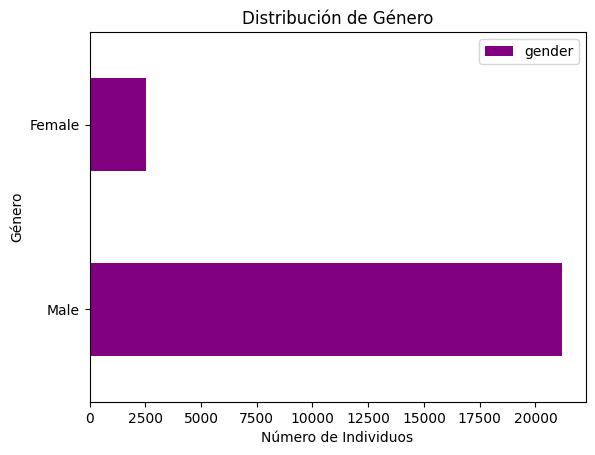

In [57]:
# VAMOS A GENDER, QUE ES CUALITATIVA, CREAMOS UN HISTOGRAMA porque tiene pocos valores unicos, por lo que se puede representar
# como en el anterior, tenemos que eliminar el género indeterminado, que afea la gráfica
filtro_genero = riquitos_forbes_13_23['gender'] != 'INDETERMINADO' # 
nombres_millonetis =riquitos_forbes_13_23[filtro_genero]['gender'].value_counts()
nombres_millonetis.plot(kind='barh', color='purple', legend=True)
plt.title('Distribución de Género')
plt.xlabel('Número de Individuos')
plt.ylabel('Género')
plt.show()

# Vemos directamente varias cosas. La primera, que el sexo femenino es mucho menos representativo y también que tenemos un INDETERMINADO representado que nos falsea el grafico
# de modo que lo eliminamos (LO MODIFICAMOS ARRIBA DIRECTAMENTE)


In [58]:
# COUNTRY_OF_CITIZENSHIP, variable que representa el pais de ciudadania, dato categorico objeto, y pasará lo mismo que con name, una gráfica con sus valores unicos se verá demasiado
# sobrecargada y será innecesaria. Guardaremos su análisis para las agrupaciones en bivariante. Haremos un value_counts(), para ver los valores unicos
riquitos_forbes_13_23.country_of_citizenship.value_counts()

United States    6956
China            3770
India            1180
Russia           1174
Germany          1148
                 ... 
Armenia             2
Uganda              2
Macao               1
Bangladesh          1
Panama              1
Name: country_of_citizenship, Length: 86, dtype: int64

In [59]:
# Vamos a la variable BUSSINESS_CATEGORY, dato objeto, y hacemos lo mismo que con la anterior
riquitos_forbes_13_23.business_category.value_counts()
# VEMOS QUE TECNOLOGIA ES LA QUE MÁS VECES APARECE, Y LAS QUE MENOS LAS COMPARTEN VARIAS 
# (Games, Social Entrepreneurs,Technology / Business O Retail & Ecommerce)          

Technology                    2687
Fashion & Retail              2357
Manufacturing                 2226
Real Estate                   2032
Diversified                   1822
Finance and Investments       1690
Healthcare                    1475
Finance & Investments         1441
Energy                        1048
Food and Beverage              979
Media & Entertainment          757
Food & Beverage                755
Metals & Mining                711
Service                        703
Automotive                     543
Construction & Engineering     506
Logistics                      363
Telecom                        327
Investments                    319
Sports                         271
Gambling & Casinos             236
Fashion and Retail             143
Media                          136
Finance                         61
Health care                     53
Retail                          31
Service & Retail                29
Gaming                          21
Food & Manufacturing

In [60]:
# Hacemos el histograma
trace0 = go.Histogram(x= riquitos_forbes_13_23['business_category'],
                      nbinsx=40,  # Número de divisiones en el eje x 
                      name='Frecuencia de las industrias')

data = [trace0]

layout = go.Layout(title='Histograma de las industrias de los millonarios',
                   xaxis=dict(title='Categoria de negocio'),
                   yaxis=dict(title='Frecuencia'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Sacamos varias conclusiones. Vemos que las empresas que más aparecen son de finance & Investments, y que las que menos, las de medicinas
# oil y gaming

In [61]:
# La siguiente, BUSINESS_INDUSTRIES, como bien pusimos solo la usaremos para la parte tecnológica, porque son subdivisiones mas detalladas,así que hay que filtrarlo
extra_riquitos_forbes = riquitos_forbes_13_23[riquitos_forbes_13_23['business_category'] =='Technology']
ricos_tecnologicos = extra_riquitos_forbes.business_industries.value_counts()

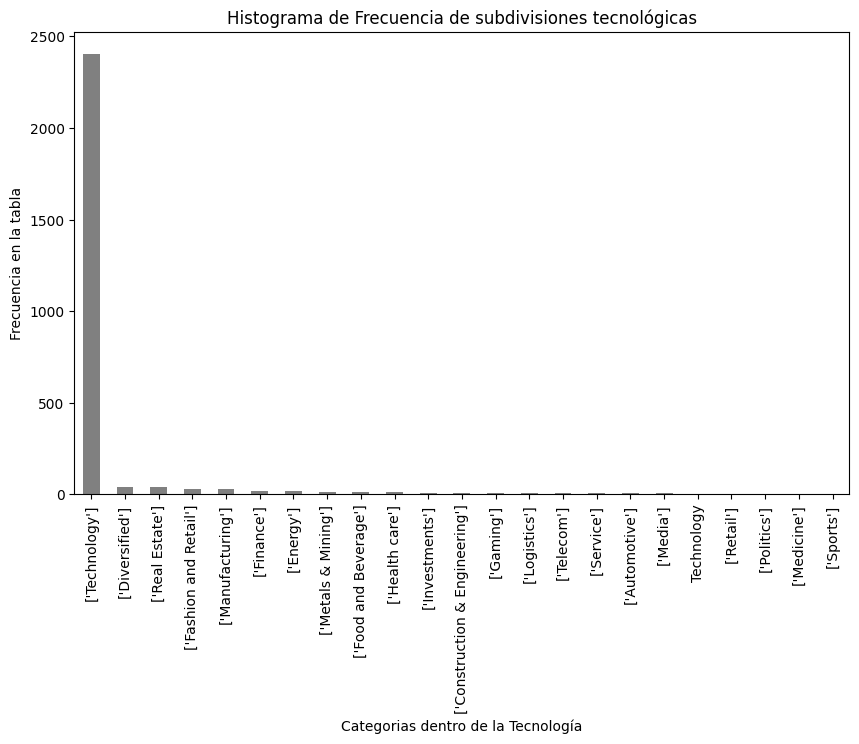

In [62]:
plt.figure(figsize=(10, 6))
ricos_tecnologicos.plot(kind= 'bar', color='grey')
plt.xlabel('Categorias dentro de la Tecnología')
plt.ylabel('Frecuencia en la tabla')
plt.title('Histograma de Frecuencia de subdivisiones tecnológicas')
plt.show()

# Tras ver la representación , tomamos una decisión, NO APORTA MUCHA INFORMACIÓN EXTRA, E INCLUSO ES CONFUSO QUE 
# LA GRAN MAYORÍA DE LAS FRECUENCIAS SE LLAME IGUAL QUE LA VARIABLE BUSINESS_CATEGORY, de modo que vamos a prescindir de ella.

In [63]:
riquitos_forbes_13_23.drop('business_industries',axis=1, inplace = True)

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\541296588.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
# Siguiente categoría, SELF-MADE. Dado que sólo son dos valores únicos,True o False, la representamos
riquitos_forbes_13_23.self_made.value_counts() 

True     16425
False     7362
Name: self_made, dtype: int64

In [65]:
fig = px.pie(riquitos_forbes_13_23, names='self_made', title='MILLONARIOS HECHOS A SI MISMOS VS FORTUNA HEREDADA ', hole=0.3)

# Mostrar el gráfico
fig.show()

In [66]:
# Por último, wealth_status, también es objeto.
riquitos_forbes_13_23.wealth_status.value_counts() 

Increased           10404
Decreased            7545
No informado         2729
Remained Even        2318
Returned to List      791
Name: wealth_status, dtype: int64

In [67]:
# Representamos en un histograma
trace0 = go.Histogram(x=riquitos_forbes_13_23['wealth_status'],
                      nbinsx=20,  # Número de divisiones en el eje x 
                      name='Salud financiera',
                      marker=dict(color='teal')) # PARA METER COLORES DISTINTOS

data = [trace0]

layout = go.Layout(title='Histograma sobre la salud financiera de los millonarios',
                   xaxis=dict(title='Salud financiera'),
                   yaxis=dict(title='Datos recogidos'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Tras hacer la gráfica, TENEMOS QUE TENER ALGO EN CUENTA, NO DA MUCHA INFORMACION, PORQUE EL AUMENTO O DISMINUCION 
# DE LA FORTUNA SIN TENER NINGUN AÑO O INDIVIDUO SOBRE EL QUE VERLO, NO SIRVE DE MUCHO. 
# Para usar esta variable, tendremos que tener en cuenta esos otros factores para sacar información REAL

In [68]:
riquitos_forbes_13_23

year    rank  net_worth                  full_name birth_date   age  \
7236   2012     1.0       69.0  Carlos Slim Helu & family 1940-01-28  72.0   
7237   2012     2.0       61.0                 Bill Gates 1955-10-28  56.0   
7238   2012     3.0       44.0             Warren Buffett 1930-08-30  81.0   
7239   2012     4.0       41.0            Bernard Arnault 1949-03-05  63.0   
7240   2012     5.0       37.5             Amancio Ortega 1936-03-28  75.0   
...     ...     ...        ...                        ...        ...   ...   
31727  2023  2540.0        1.0                    Yu Rong 1971-12-14  51.0   
31728  2023  2540.0        1.0     Richard Yuengling, Jr. 1943-03-10  80.0   
31729  2023  2540.0        1.0              Zhang Gongyun 1962-12-18  60.0   
31730  2023  2540.0        1.0     Zhang Guiping & family 1951-08-21  71.0   
31731  2023  2540.0        1.0                Inigo Zobel 1956-11-01  66.0   

      gender country_of_citizenship business_category self_made  \
7236    Male                 Mexico        Technology      True   
7237    Male          United States        Technology      True   
7238    Male          United States       Investments      True   
7239    Male                 France        Technology     False   
7240    Male                  Spain  Fashion & Retail      True   
...      ...                    ...               ...       ...   
31727   Male                  China        Healthcare      True   
31728   Male          United States   Food & Beverage     False   
31729   Male                  China     Manufacturing      True   
31730   Male                  China       Real Estate      True   
31731   Male            Philippines       Diversified     False   

          wealth_status  
7236          Decreased  
7237          Increased  
7238          Decreased  
7239      Remained Even  
7240          Increased  
...                 ...  
31727         Decreased  
31728     Remained Even  
31729  Returned to List  
31730         Decreased  
31731  Returned to List  

[23787 rows x 11 columns]

<Axes: >

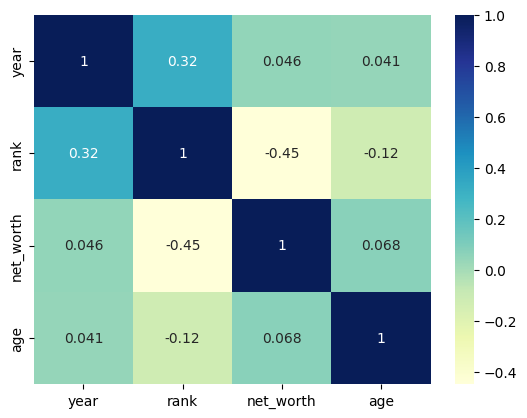

In [69]:
# CON TODOS LOS ANÁLISIS UNIVARIANTES HECHOS, PODEMOS PASAR A LA RELACION ENTRE VARIABLES (ANALISIS BIVARIANTE Y MULTIVARIANTE.)
# PRIMERO CREAMOS UN MAPA DE CALOR PARA VER LA CORRELACION ENTRE TODAS (aunque solo podemos hacerlo con variables númericas, claramente)
sns.heatmap(riquitos_forbes_13_23.corr(numeric_only=True), annot=True, cmap='YlGnBu', cbar=True)


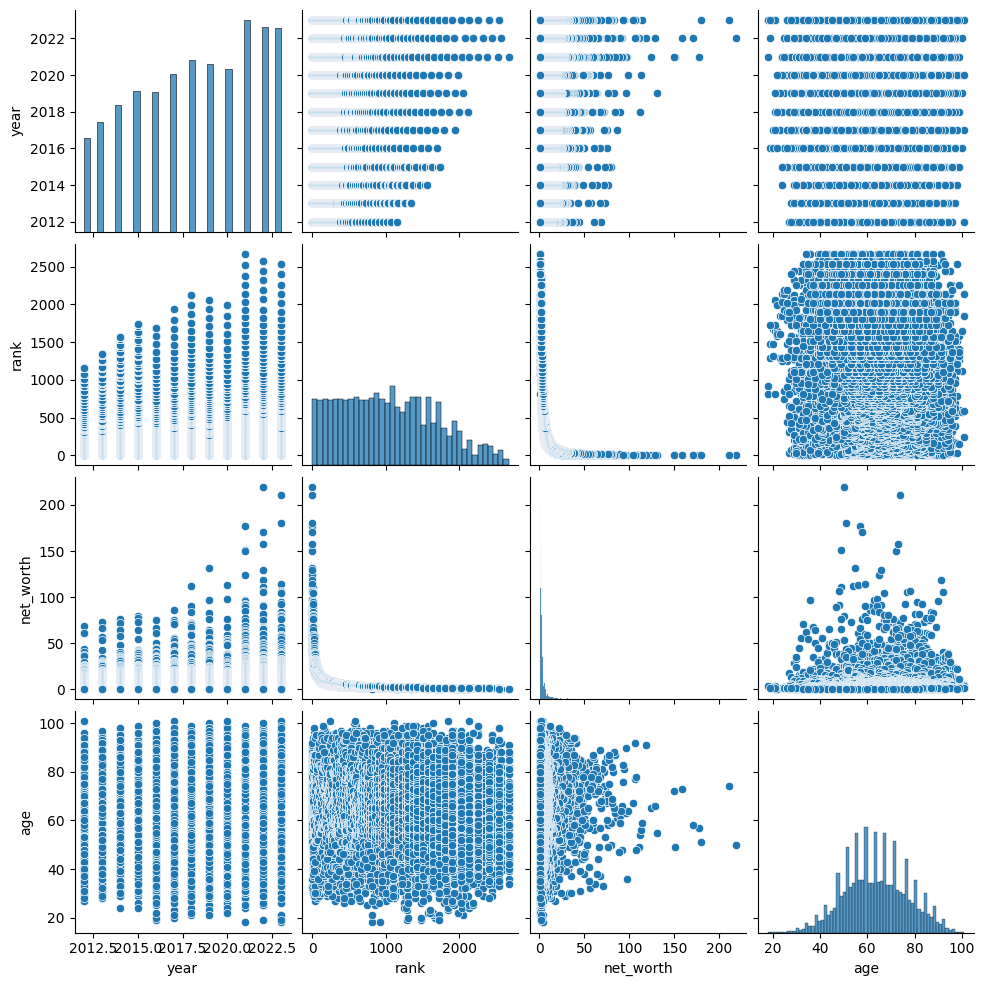

In [70]:
# También nos serviremos de un grid de gráficas con pairplot
# Eliminamos las columnas no numéricas 
RIQUITOS_NUMERICOS = riquitos_forbes_13_23.select_dtypes(include=['float64', 'int64'])
sns.pairplot(RIQUITOS_NUMERICOS)

# AUNQUE ES DIFICIL VER MUCHAS RELACIONES, PUES HAY VARIABLES QUE DEPENDEN DE LOS AÑOS, Y QUE INCLUSO SE REPITEN,
# COMO EL FULL NAME, LOS RANK PUEDEN CAMBIAR de un año a otro...

In [71]:
# No parece que las varibles numéricas de nuestro Dataframe estén muy relacionadas, ni positiva ni negativamente (ninguno supera 
# los 0,67 o -0,67) aunque si que podemos ver una relación negativa más marcada entre RANK y NETWORTH y una ligeramente positiva
# entre YEAR y RANK(aunque no muy clara)
# HAREMOS UN SCATTER PLOT PARA LA RELACION DE RANK Y NET_WORTH
trace = go.Scatter(x=riquitos_forbes_13_23['rank'], y=riquitos_forbes_13_23['net_worth'], mode='markers', text=riquitos_forbes_13_23['full_name'], marker=dict(size=8, color='blue'))

layout = go.Layout(title='Scatter Plot de Rank vs Net Worth',
                   xaxis=dict(title='Rank'),
                   yaxis=dict(title='Net Worth'))

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# A MAS BAJO EL NETWORTH MAS ALTO ESTÁN EN EL RANKING, PERO NO SE VE TOTALMENTE BIEN REPRESENTADA
# DE CUALQUIER FORMA, DEBERIAMOS TENER EN CUENTA TAMBIÉN EL AÑO EN LA COMPARACIÓN, PUES EL RANKING PUEDE IR CAMBIANDO CADA AÑO!!!

In [72]:
# Y CONOCIENDO NUESTRAS VARIABLES TRAS SU ESTUDIO INDIVIDUAL, LA RELACION ENTRE AÑO Y RANK NO TIENE SENTIDO, pues RANK se reinicia 
# y empieza en 1 cada año (al ser un ranking relacionado con net_worth (patrimonio del individuo), puede haber personas diferentes en la posición uno cada año
# por lo que no podemos decir que a más o menos años hay maás o menos RANKING)

In [73]:
# HARE UN ULTIMO ANÁLISIS, SOLO DEL AÑO 2023, PARA SACAR DATOS GENERALES
# CREAMOS UN DATAFRAME CON UN FILTRO SOLO DEL AÑO 2023
forbes_2023 = riquitos_forbes_13_23[riquitos_forbes_13_23['year'] ==2023]

forbes_2023.head(20) # el ranking 20 de los millonarios, POR NET_WORTH, PATRIMONIO EN MILES DE MILLONES DE DOLARES, BILLONES DE DOLARES

year  rank  net_worth                              full_name  \
29092  2023   1.0      211.0               Bernard Arnault & family   
29093  2023   2.0      180.0                              Elon Musk   
29094  2023   3.0      114.0                             Jeff Bezos   
29095  2023   4.0      107.0                          Larry Ellison   
29096  2023   5.0      106.0                         Warren Buffett   
29097  2023   6.0      104.0                             Bill Gates   
29098  2023   7.0       94.5                      Michael Bloomberg   
29099  2023   8.0       93.0              Carlos Slim Helu & family   
29100  2023   9.0       83.4                          Mukesh Ambani   
29101  2023  10.0       80.7                          Steve Ballmer   
29102  2023  11.0       80.5  Francoise Bettencourt Meyers & family   
29103  2023  12.0       79.2                             Larry Page   
29104  2023  13.0       77.3                         Amancio Ortega   
29105  2023  14.0       76.0                            Sergey Brin   
29106  2023  15.0       68.0                         Zhong Shanshan   
29107  2023  16.0       64.4                        Mark Zuckerberg   
29108  2023  17.0       59.0                           Charles Koch   
29109  2023  17.0       59.0                    Julia Koch & family   
29110  2023  19.0       58.8                             Jim Walton   
29111  2023  20.0       57.6                             Rob Walton   

      birth_date   age  gender country_of_citizenship      business_category  \
29092 1949-03-05  74.0    Male                 France       Fashion & Retail   
29093 1971-06-28  51.0    Male          United States             Automotive   
29094 1964-01-12  59.0    Male          United States             Technology   
29095 1944-08-17  78.0    Male          United States             Technology   
29096 1930-08-30  92.0    Male          United States  Finance & Investments   
29097 1955-10-28  67.0    Male          United States             Technology   
29098 1942-02-14  81.0    Male          United States  Media & Entertainment   
29099 1940-01-28  83.0    Male                 Mexico                Telecom   
29100 1957-04-19  65.0    Male                  India            Diversified   
29101 1956-03-24  67.0    Male          United States             Technology   
29102 1953-07-10  69.0  Female                 France       Fashion & Retail   
29103 1973-03-26  50.0    Male          United States             Technology   
29104 1936-03-28  87.0    Male                  Spain       Fashion & Retail   
29105 1973-08-21  49.0    Male          United States             Technology   
29106 1954-12-01  68.0    Male                  China        Food & Beverage   
29107 1984-05-14  38.0    Male          United States             Technology   
29108 1935-11-01  87.0    Male          United States            Diversified   
29109 1962-04-12  60.0  Female          United States            Diversified   
29110 1948-06-07  74.0    Male          United States       Fashion & Retail   
29111 1944-10-27  78.0    Male          United States       Fashion & Retail   

      self_made wealth_status  
29092     False     Increased  
29093      True     Decreased  
29094      True     Decreased  
29095      True     Increased  
29096      True     Decreased  
29097      True     Decreased  
29098      True     Increased  
29099      True     Increased  
29100     False     Decreased  
29101      True     Decreased  
29102     False     Increased  
29103      True     Decreased  
29104      True     Increased  
29105      True     Decreased  
29106      True     Increased  
29107      True     Decreased  
29108     False     Decreased  
29109     False     Decreased  
29110     False     Decreased  
29111     False     Decreased

In [74]:
# Cuantos individuos componen el ranking de este año
len(forbes_2023['rank']) # 2563 individuos

2563

In [75]:
# CUAL ES EL PATRIMONIO MAXIMO, PUESTO 1 Y MINIMO, PUESTO 2563 y a quien pertenenecen (con una máscara)
print(forbes_2023.net_worth.max()) # 211 billones de dolares, 211 mil millones de dolares
print(forbes_2023.net_worth.min()) # 1 billon de dolares, mil millones de dolares

print(forbes_2023[forbes_2023.net_worth == 211]) # 1 solo,  Bernard Arnault & family 
print(forbes_2023[forbes_2023.net_worth == 1]) # RANKING 2540, LO COMPARTEN 97 NOMBRES

211.0
1.0
       year  rank  net_worth                 full_name birth_date   age  \
29092  2023   1.0      211.0  Bernard Arnault & family 1949-03-05  74.0   

      gender country_of_citizenship business_category self_made wealth_status  
29092   Male                 France  Fashion & Retail     False     Increased  
       year    rank  net_worth               full_name birth_date   age  \
31631  2023  2540.0        1.0     Manohar Lal Agarwal 1954-10-30  68.0   
31632  2023  2540.0        1.0    Christian Angermayer 1978-04-26  44.0   
31633  2023  2540.0        1.0              Ryuji Arai 1946-05-28  76.0   
31634  2023  2540.0        1.0        Anna Maria Braun 1979-01-01  44.0   
31635  2023  2540.0        1.0           Johanna Braun 1980-01-01  43.0   
...     ...     ...        ...                     ...        ...   ...   
31727  2023  2540.0        1.0                 Yu Rong 1971-12-14  51.0   
31728  2023  2540.0        1.0  Richard Yuengling, Jr. 1943-03-10  80.0   
3172

In [76]:
# PODEMOS ENCONTRAR LA MEDIA DE EDAD DE LOS MILLONARIOS DE LA LISTA, el máximo y el mínimo
print(forbes_2023['age'].min())
print(forbes_2023['age'].max())
print(forbes_2023['age'].mean())

18.0
101.0
65.1958642216153


In [77]:
# También el género más comun
forbes_2023.gender.value_counts() # Masculino

Male      2259
Female     304
Name: gender, dtype: int64

In [78]:
# La ciudad de residencia con más millonarios
forbes_2023.country_of_citizenship.value_counts() # Estados Unidos, seguido de China e India

United States    735
China            468
India            169
Germany          107
Russia           104
                ... 
Nepal              1
Zimbabwe           1
Portugal           1
Iceland            1
Panama             1
Name: country_of_citizenship, Length: 77, dtype: int64

In [79]:
# EL NEGOCIO EN EL QUE SE HAN HECHO MILLONARIOS
forbes_2023.business_category.value_counts() # Tecnología en este año se mantiene en el tercer lugar, precedido de Finance & Investments y Manufacturing

Finance & Investments         363
Manufacturing                 313
Technology                    306
Fashion & Retail              259
Food & Beverage               198
Healthcare                    194
Real Estate                   191
Diversified                   182
Energy                         97
Media & Entertainment          87
Metals & Mining                73
Automotive                     70
Service                        53
Construction & Engineering     44
Sports                         39
Logistics                      38
Telecom                        31
Gambling & Casinos             25
Name: business_category, dtype: int64

In [80]:
# Cuantos millonarios derivan de riqueza heredada y cuantos se han hecho millonarios por sus medios
forbes_2023.self_made.value_counts() # 1778 se han hecho por sus medios y 785 son heredados o conseguidos por otros medios

True     1778
False     785
Name: self_made, dtype: int64

In [81]:
# Y POR ULTIMO, COMO SE HAN MANTENIDO SUS RIQUEZAS EN ESTE AÑO CON RESPECTO AL AÑO ANTERIOR
forbes_2023.wealth_status.value_counts() # LA MAYORIA HA DISMINUIDO, muchos han aumentado, 261 se han mantenido en la misma posicion de la lista y 64 han vuelto

Decreased           1194
Increased            838
Remained Even        261
No informado         206
Returned to List      64
Name: wealth_status, dtype: int64

In [82]:
# UNA VEZ ANALIZADAS LAS VARIABLES DE MANERA INDIVIDUAL Y COLECTIVA, PODEMOS EMPEZAR A REVISAR LAS HIPÓTESIS Y REALIZAR 
# LAS AGRUPACIONES NECESARIAS PARA NUESTRAS RESPUESTAS
# VOLVEMOS A RECORDAR LAS VARIABLES CON LAS QUE NOS HEMOS QUEDADO
riquitos_forbes_13_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23787 entries, 7236 to 31731
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    23787 non-null  int64         
 1   rank                    23787 non-null  float64       
 2   net_worth               23787 non-null  float64       
 3   full_name               23787 non-null  object        
 4   birth_date              23787 non-null  datetime64[ns]
 5   age                     23787 non-null  float64       
 6   gender                  23787 non-null  object        
 7   country_of_citizenship  23787 non-null  object        
 8   business_category       23787 non-null  object        
 9   self_made               23787 non-null  object        
 10  wealth_status           23787 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 2.2+ MB


Y LAS HIPOTESIS (LA PRINCIPAL Y LAS ANEXAS)
hipotesis_total = "La edad y el género de un billonario influye en la probabilidad de tener una empresa tecnológica. La preferencia por sectores tecnológicos se relaciona con la edad del billonario y con su género"
HIPOTESIS1 = "Los billonarios más jóvenes podrían tener una mayor probabilidad de tener empresas tecnológicas debido a su familiaridad con las tendencias actuales."
HIPOTESIS2 = "Podría haber diferencias en la participación en industrias tecnológicas emergentes entre mujeres y hombres billonarios, siendo mayores las de los hombres"
# hipotesis_2 = "Algunas industrias, como las tecnológicas o las de finanzas e inversiones, pueden tener una concentración mayor de multimillonarios"
# hipotesis_3 = "La cantidad de mujeres billonarias que han alcanzado su fortuna a una edad temprana es menor de las que lo han logrado más tarde en la vida y la edad de inicio y la nacionalidad podría influir en la elección de la industria en la que las mujeres billonarias tienen éxito."
# hipotesis_4 = "Los millonarios en España han aumentado en la última década"
# hipotesis_5 = "Orígenes de la Riqueza: HEREDADA O GENERADA? Hipótesis: Los multimillonarios pueden haber acumulado riqueza a través de una herencia o por emprendimiento, PERO SON MAS COMUNES LOS MILLONARIOS EMPRENDEDORES"
# hipotesis_6 = "La educación y la trayectoria profesional pueden tener impactos significativos en la acumulación de riqueza. A EDUCACIÓN SUPERIOR, MAYOR PROBABILIDAD DE SER MILLONARIO"
# hipotesis_7 = "Eventos económicos significativos, como el COVID, podrían influir en la tasa de crecimiento de la fortuna de los billonarios"
# hipotesis_8 = "La nacionalidad podría influir en las preferencias de inversión, reflejando diferencias económicas y culturales, COMO POR EJEMPLO, LA PREFERENCIA EN LA INDUSTRIA TECNOLOGICA EN ESTADOS UNIDOS O EN LA VENTA INTERNACIONAL EN CHINA."
# hipotesis_9 = "Aquellos que aparecen en la lista de billonarios de manera consistente (durante mas años seguidos) podrían tener fortunas más estables"
# hipotesis_10 (LOCA) = "Hipótesis del horóscopo chino de Wealth-X, las personas nacidas en el año del dragón (1940, 1952, 1964, 1976, 1988, 2000, 2012) tienen más probabilidades de acumular riqueza. ¿El horóscopo chino puede predecir la fortuna financiera?"

In [83]:
# Haremos primero la hipótesis principal, y luego las que nos den tiempo de las demás. PRIMERO, VEO MÁS UTIL PONER COMO ÍNDICE DE MOMENTO EL AÑO DE RECOGIDA DEL DATO
# SI HAY QUE AGRUPAR POR OTRO DATO, HAREMOS UN SET_INDEX O UN RESET INDEX PARA VOLVER A TRANSFORMAR EN COLUMNA EL INDICE ACTUAL
riquitos_forbes_13_23.set_index('year', inplace = True)

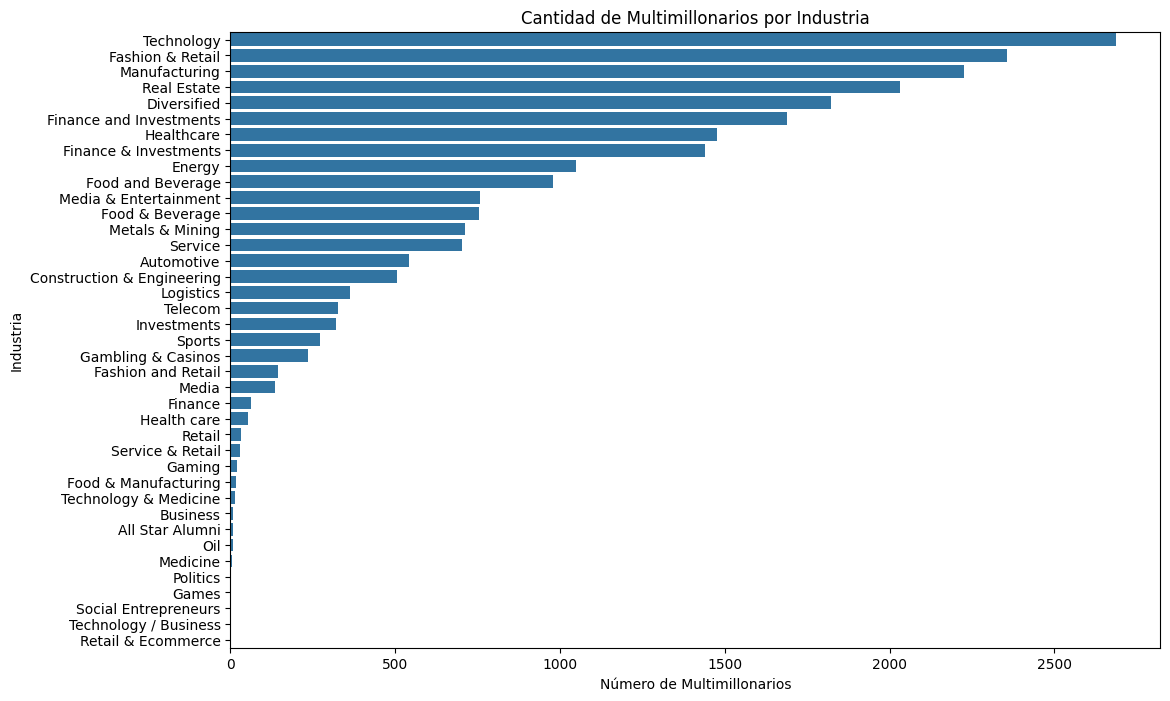

In [84]:
# hipotesis_2 = "Algunas industrias, como las tecnológicas o las de finanzas e inversiones, pueden tener una concentración mayor de multimillonarios"
plt.figure(figsize=(12, 8))
sns.countplot(y='business_category', data=riquitos_forbes_13_23, order=riquitos_forbes_13_23['business_category'].value_counts().index)
plt.title('Cantidad de Multimillonarios por Industria')
plt.xlabel('Número de Multimillonarios')
plt.ylabel('Industria')
plt.show()

# HIPOTESIS CONFIRMADA EN EL CASO DE LA TECNOLOGÍA, PERO NO EN LAS FINANZAS, QUE CAEN AL SEXTO U OCTAVO PUESTO.
# SIN EMBARGO, CUANDO HEMOS VISTO LAS DEL AÑO 2023, SI QUE NOS HA SALIDO FINANZAS COMO LA CATEGORIA QUE MÁS MILLONARIOS MANTIENEN EN LA LISTA

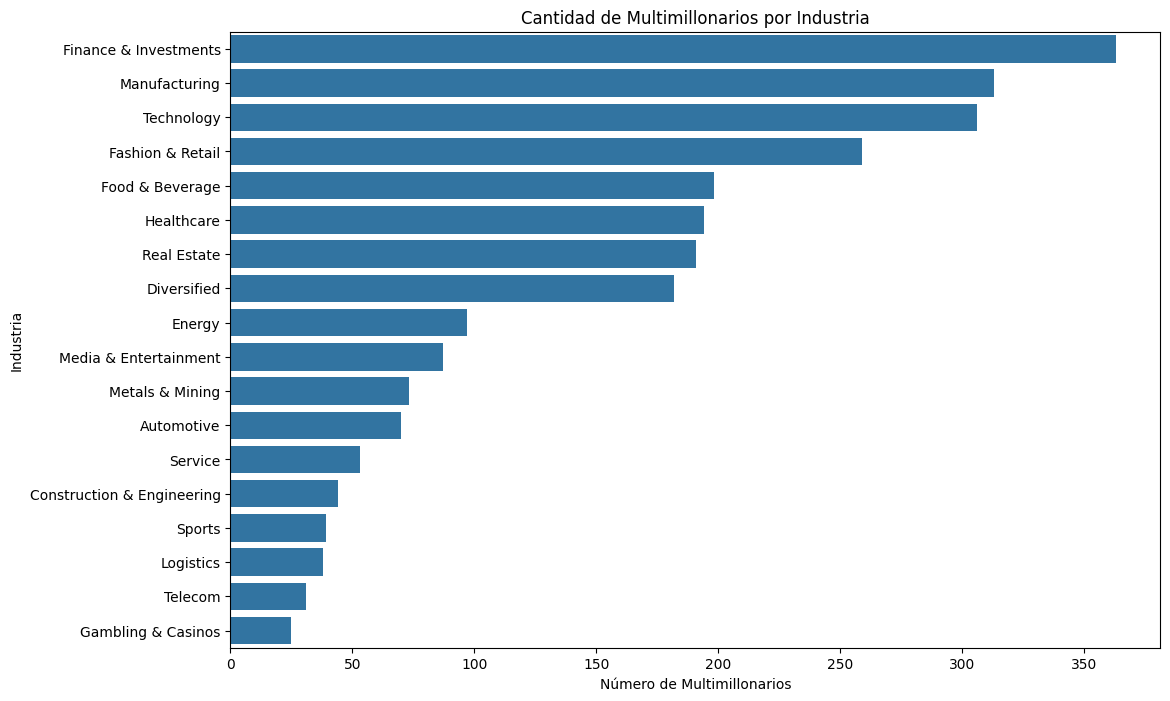

In [85]:
plt.figure(figsize=(12, 8))
sns.countplot(y='business_category', data=forbes_2023, order=forbes_2023['business_category'].value_counts().index)
plt.title('Cantidad de Multimillonarios por Industria')
plt.xlabel('Número de Multimillonarios')
plt.ylabel('Industria')
plt.show()

In [86]:
# PARA ASEGURARNOS DE QUE ESTAMOS CONTANDO CORRECTAMENTE (PUES NOS PREOCUPA QUE SE ESTEN CONTANDO EN AÑOS DISTINTOS LOS NOMBRES IGUALES COMO OTRA REFERENCIA)
# Eliminamos duplicados basados en la columna 'full_name' y creamos el gráfico

forbes_sin_duplicados = riquitos_forbes_13_23.drop_duplicates(subset=['full_name']) # para que se vean mas claros

fig = px.bar(forbes_sin_duplicados, y='business_category', color='business_category',
             title='Cantidad de Multimillonarios por Industria',
             labels={'business_category': 'Industria'},
             category_orders={'business_category': forbes_sin_duplicados['business_category'].value_counts().index})
            

fig.update_layout(yaxis_title='Industria', xaxis_title='Numero de millonarios')

# Y YA LOS TENEMOS
# HIPOTESIS CONFIRMADA EN EL CASO DE LA TECNOLOGÍA, PERO NO EN LAS FINANZAS, QUE CAEN AL CUARTO PUESTO.

In [87]:
# Hipotesis 3: = "La cantidad de mujeres billonarias que han alcanzado su fortuna a una edad temprana es menor de las que lo han logrado más tarde en la vida
# y la edad de inicio y la nacionalidad podría influir en la elección de la industria en la que las mujeres billonarias tienen éxito."
# Necesitamos el dato de la edad, el genero femenino, y la nacionalidad; así como el tipo de industrias en las que 
# las mujeres prosperan. Lo primero, FILTRAMOS EL DATAFRAME PARA SOLO EL GÉNERO FEMENINO. Nos serviremos del que ya tenía eliminado los duplicados
# para que los nombres no se repitan
mujeres_millonarias = forbes_sin_duplicados[forbes_sin_duplicados['gender'] == 'Female']
mujeres_millonarias



rank  net_worth                     full_name birth_date   age  \
year                                                                     
2012    11.0       25.3       Christy Walton & family 1955-01-01  57.0   
2012    15.0       24.0  Liliane Bettencourt & family 1922-10-21  89.0   
2012    17.0       23.3                  Alice Walton 1949-10-07  62.0   
2012    29.0       18.0             Georgina Rinehart 1954-02-09  58.0   
2012    32.0       17.8        Iris Fontbona & family 1943-01-01  69.0   
...      ...        ...                           ...        ...   ...   
2023  2259.0        1.2                     Ning Zhao 1967-01-01  56.0   
2023  2405.0        1.1               Abigail Bennett 1980-12-27  42.0   
2023  2405.0        1.1                   Renu Munjal 1955-03-06  68.0   
2023  2540.0        1.0                Benedicte Find 1954-09-21  68.0   
2023  2540.0        1.0               Ghan Djoe Hiang 1943-09-03  79.0   

      gender country_of_citizenship   business_category self_made  \
year                                                                
2012  Female          United States  Fashion and Retail     False   
2012  Female                 France    Fashion & Retail     False   
2012  Female          United States  Fashion and Retail     False   
2012  Female              Australia     Metals & Mining     False   
2012  Female                  Chile     Metals & Mining     False   
...      ...                    ...                 ...       ...   
2023  Female          United States          Healthcare      True   
2023  Female          United States     Food & Beverage     False   
2023  Female                  India          Automotive     False   
2023  Female                Denmark          Healthcare     False   
2023  Female              Indonesia              Energy     False   

     wealth_status  
year                
2012     Decreased  
2012     Increased  
2012     Increased  
2012     Increased  
2012     Decreased  
...            ...  
2023  No informado  
2023  No informado  
2023  No informado  
2023     Decreased  
2023  No informado  

[503 rows x 10 columns]

In [88]:
# y ahora, tratamos de responder a nuestras preguntas, LAS MILLONARIAS TRIUNFAN A EDAD MÁS TEMPRANA O NO?
print(mujeres_millonarias.age.mean()) # La edad media son 59 años, no parece que triunfen jovenes, pero vamos a ver las que tienen menos edad
# CONSIDEREMOS QUE TRIUNFAR A EDAD JOVEN SEA HACERSE MILLONARIA ANTES DE LOS 40 (AUN ESTOY A TIEMPO)
print(len(mujeres_millonarias[mujeres_millonarias.age < 40])) # hay 43 mujeres de las 503 millonarias antes de los 40, es un porcentaje pequeño
# y si disminuimos a 34 (mi edad)
print(len(mujeres_millonarias[mujeres_millonarias.age < 34])) # SOLO 19!! Tengo esperanzas

# CONFIRMACIÓN A LA PRIMERA CUESTIÓN DE LA HIPOTESIS 3, AFIRMATIVA, LAS MUJERES TRIUNFAN A MAYOR EDAD


59.288270377733596
43
19


In [89]:
# representado en boxplot
trace0 = go.Box(y=mujeres_millonarias['age'],
                name='Edades de las millonarias')

data = [trace0]

layout = go.Layout(title='Gráfico de Caja de Edades de mujeres millonarias',
                   yaxis=dict(title='Edad'),
                   xaxis=dict(title=''),
                   showlegend=False)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [90]:
# segunda pregunta, ¿LA ELECCION DE LA INDUSTRIA DEPENDE DE LA EDAD? Primero, veremos en que industrias están presentes.
mujeres_millonarias.business_category.value_counts() # sobre todo en manufacturing, Tecnologia (BIIIEN) Y FASHION RETAIL


Manufacturing                 59
Technology                    53
Fashion & Retail              50
Diversified                   44
Food and Beverage             41
Healthcare                    36
Real Estate                   27
Food & Beverage               21
Service                       21
Finance and Investments       20
Energy                        14
Construction & Engineering    13
Media & Entertainment         12
Automotive                    12
Finance & Investments          9
Logistics                      9
Fashion and Retail             9
Metals & Mining                9
Media                          8
Sports                         7
Health care                    5
Retail                         5
Gambling & Casinos             4
Investments                    3
Business                       3
Finance                        3
Medicine                       2
Service & Retail               1
Gaming                         1
Retail & Ecommerce             1
Telecom   

In [91]:
# Ahora, me toca agrupar por edad e industria y contar la cantidad de multimillonarias en cada grupo
millonarias_agrupadas = mujeres_millonarias.groupby(['age', 'business_category']).size().reset_index(name='count')

# Y CREAMOS LA VISUALIZACION
fig = px.bar(millonarias_agrupadas, x='business_category', y='count', color='age',
             labels={'count': 'Cantidad de Multimillonarias'},
             title='Cantidad de Multimillonarias por Edad e Industria')

fig.show()

# NOTA A RECORDAR, ME HA DADO PROBLEMAS A LA HORA DE AGRUPAR, ME EMPEÑABA EN AGRUPAR SOBRE AGE Y LUEGO PONER ENTRE CORCHETES BUSINESS CATEGORY. 
# TENERLO CLARO PARA LAS PROXIMAS VECES.

# PODEMOS VISUALIZAR LA MEDIA DE EDAD POR INDUSTRIA Y VEMOS QUE, POR EJEMPLO, LAS CHICAS JOVENES SON MAS COMUNES EN DIVERsIFIED, MEDIA & ENTERTAIMENT Y RETAIL&ECOMMERCE.
# MIENTRAS QUE LAS MÁS MAYORES ESTÁN MAS REPRESENTADAS EN TODOS LOS SECTORES. Hay algunos sectores como manufacturing, el más común, 
# que tiene representaciones de casi todas las edades. 
# COMO RESPUESTA A NUESTRA HIPÓTESIS, ES BASTANTE MÁS VISIBLE QUE LAS MILLONARIAS JÓVENES INVIERTEN EN SECTORES MÁS ESPECIALIZADOS QUE LAS MAYORES, PERO NO HAY UNA RESPUESTA CLARA.
# RECICLARE ESTA GRÁFICA PARA LA RESPUESTA A MI HIPOTESIS PRINCIPAL, SOLO CON TECNOLOGIA!

In [92]:
# y por categoria de negocio y nacionalidad
millonarias_agrupadas2 = mujeres_millonarias.groupby(['business_category', 'country_of_citizenship']).size().reset_index(name='count')

# Y CREAMOS LA VISUALIZACION
fig = px.bar(millonarias_agrupadas2, x='business_category', y='count', color='country_of_citizenship',
             labels={'count': 'Cantidad de Multimillonarias'},
             title='Cantidad de Multimillonarias por Nacionalidad e Industria elegida')

fig.show()

# Vemos una variedad en los países, por lo que no podemos asegurar nuestra hipótesis de que la nacionalidad 
# tiene alguna relación con la industria de la millonaria


In [93]:
# para representar solo los 5 paises en los que hay mas millonarias, y lo mismo con España
mujeres_millonarias.country_of_citizenship.value_counts().head(5) # y puedo marcarlos en mi gráfica anterior y pasarla al power point

United States    140
China             82
Germany           43
Italy             24
Brazil            22
Name: country_of_citizenship, dtype: int64

In [94]:
# HIPOTESIS 4: Los mil millonarios Españoles tienen mas representación en Forbes en los ultimos diez años, creamos un filtro en el que country_of_citizenship = Spain.
# VOY A COGER ESTA VEZ EL DATAFRAME ORIGINAL, PORQUE QUIERO VER SI EL SUMATORIO POR AÑO DE LOS QUE SON DE ESPAÑA HA AUMENTADO EN LOS ULTIMOS AÑOS
compatriotas_millonarios = riquitos_forbes_13_23[riquitos_forbes_13_23.country_of_citizenship == 'Spain']

compatriotas_millonarios = compatriotas_millonarios.reset_index() # para volver a tener una columna año

# Agrupamos por año y asi contamos cuántos millonarios hay en cada año
españoles_ricos = compatriotas_millonarios['year'].value_counts().sort_index()

# y lo dibujamos
fig = px.bar(españoles_ricos, x='year', title='Cantidad de Millonarios en España por Año',
             labels={'year': 'Año', 'count': 'Cantidad de Millonarios'})

fig.update_layout(xaxis_title='Año', yaxis_title='Cantidad de Millonarios')
fig.show()

# COMO RESPUESTA A LA HIPOTESIS, AUNQUE BIEN ES CIERTO QUE DESDE 2012 HAN IDO EN AUMENTO, HAY BASTANTES FLUCTUACIONES
# DE MODO QUE NO, NO ASEGURAMOS QUE LOS MILLONARIOS HAN AUMENTADO EN ESPAÑA, AUNQUE BIEN ES CIERTO QUE AQUI NO TENEMOS
# A TODOS LOS MILLONARIOS, SOLO A LOS QUE SALEN EN FORBES QUE TIENEN FORTUNAS POR ENCIMA DE MIL MILLONES, 
# DE MODO QUE NO SERÍA TAMPOCO MUY ÚTIL ESTA VALIDACIÓN


In [95]:
# HIPOTESIS 5:"El PIB de un país repercute de manera positiva en el número de millonarios del mismo, 
# a mayor PIB, MAYOR CONCENTRACIÓN DE MILLONARIOS. Queria servirme del dataframe ya limpio PIB ANUAL Y POR PAIS, TRAS DESCUBRIR
# LOS 10 PAISES CON MAS MILLONARIOS, pero en mi dataframe PIB ANUAL, LO QUE SE ESTUDIA ES COMO HA EVOLUCIONADO EL PIB DE UN AÑO A OTRO,
# NO LA CANTIDAD TOTAL, POR LO QUE FINALMENTE NO ME SERVIRÍA PARA RESPALDAR NINGUNA HIPÓTESIS 
paises_millonarios = forbes_sin_duplicados['country_of_citizenship'].value_counts().reset_index().head(10)

paises_millonarios # DE TODAS FORMAS, ESTOS SERÍAN LOS 10 PAISES CON MAS MILLONARIOS, ESPAÑA NO ESTÁ ENTRE ELLOS.


index  country_of_citizenship
0  United States                    1073
1          China                    1037
2          India                     250
3        Germany                     200
4         Russia                     194
5         Brazil                     121
6      Hong Kong                     110
7    South Korea                     106
8         Canada                      92
9          Italy                      91

In [96]:
fig = px.bar(paises_millonarios, x='index', y='country_of_citizenship', color = 'country_of_citizenship', title='Top 10 Países con más Multimillonarios')
fig.update_xaxes(title_text='País')
fig.update_yaxes(title_text='Número de Multimillonarios')

In [97]:
# HIPOTESIS 5, ¿RIQUEZA HEREDADA O HECHA POR UNO MISMO? usaremos la columna SELF MADE. Si es True, es HECHO A SI MISMO, NO HEREDADA.
# Para esta hipotesis, tambien uso el dataframe con los duplicados eliminados
forbes_sin_duplicados.self_made.value_counts()


True     3204
False    1265
Name: self_made, dtype: int64

<Axes: xlabel='self_made', ylabel='count'>

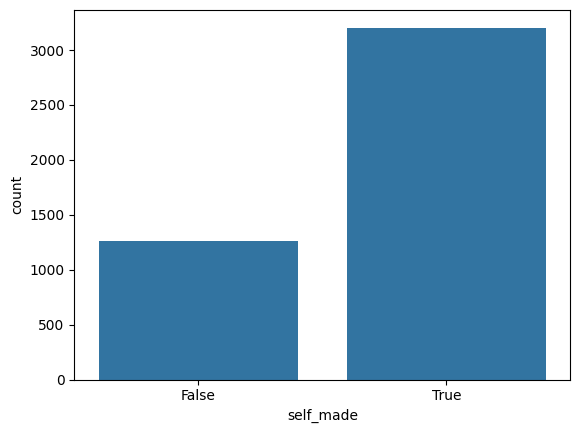

In [98]:
# si lo quiero representado, PUEDO USAR UN COUNTPLOT DE SEABORN, QUE HACE EL CONTEO DIRECTAMENTE
emprendedores = forbes_sin_duplicados['self_made']
sns.countplot(x = emprendedores)

# COMO RESPUESTA A LA HIPOTESIS, SI, SON MAS COMUNES LOS EMPRENDEDORES O HECHOS A UNO MISMO QUE LOS QUE HAN HEREDADO LA RIQUEZA

In [99]:
# hipotesis_6 = "Eventos económicos significativos, como el COVID, podrían influir en la tasa de crecimiento de la fortuna de los billonarios"
# TENEMOS QUE METER DE FILTRO 2020-2021, AUNQUE YA TENEMOS UNA GRAFICA QUE NOS LO ACLARA EN OTRO DATASET, EL DE PRUEBA VARIACION 2020-2021

# Y, AUNQUE HAY ALGUNOS PAISES COMO ALEMANIA, PAISES BAJOS, ITALIA Y SOBRE TODO JAPON QUE SE VIERON PERJUDICADOS DE 2020 A 2021,
# HAY OTROS, COMO BELGICA, AUSTRIA, INDIA Y SOBRE TODO TAIWAN (curioso que fuera despues del covid) QUE SE VIERON BENEFICIADOS


In [100]:
# IMPORTANTE!!PARA ESTE FILTRO UTILIZO EL DATAFRAME ORIGINAL!! SI HUBIESE USADO EL DEL FILTRO DE LOS DUPLICADOS, NO TENDRIAMOS LOS PRIMEROS PUESTOS!
riquitos_forbes_13_23.reset_index(inplace = True)
forbes_2022 = riquitos_forbes_13_23[riquitos_forbes_13_23.year == 2022]
forbes_2022.head(20)

# SI NECESITO INFORMACION DE SUS INGRESOS ANUALES O DEL NOMBRE DE SU COMPAÑIA, LOS TENGO EN EL DATAFRAME DE WEALTH_SOURCE (VER COMO FUSIONARLOS AHORA)

year  rank  net_worth                              full_name  \
18651  2022   1.0      219.0                              Elon Musk   
18652  2022   2.0      171.0                             Jeff Bezos   
18653  2022   3.0      158.0               Bernard Arnault & family   
18654  2022   4.0      129.0                             Bill Gates   
18655  2022   5.0      118.0                         Warren Buffett   
18656  2022   6.0      111.0                             Larry Page   
18657  2022   7.0      107.0                            Sergey Brin   
18658  2022   8.0      106.0                          Larry Ellison   
18659  2022   9.0       91.4                          Steve Ballmer   
18660  2022  10.0       90.7                          Mukesh Ambani   
18661  2022  11.0       90.0                           Gautam Adani   
18662  2022  12.0       82.0                      Michael Bloomberg   
18663  2022  13.0       81.2              Carlos Slim Helu & family   
18664  2022  14.0       74.8  Francoise Bettencourt Meyers & family   
18665  2022  15.0       67.3                        Mark Zuckerberg   
18666  2022  16.0       66.2                             Jim Walton   
18667  2022  17.0       65.7                         Zhong Shanshan   
18668  2022  18.0       65.3                           Alice Walton   
18669  2022  19.0       65.0                             Rob Walton   
18670  2022  19.0       65.0                         Changpeng Zhao   

      birth_date   age  gender country_of_citizenship      business_category  \
18651 1971-06-28  50.0    Male          United States             Automotive   
18652 1964-01-12  58.0    Male          United States             Technology   
18653 1949-03-05  73.0    Male                 France       Fashion & Retail   
18654 1955-10-28  66.0    Male          United States             Technology   
18655 1930-08-30  91.0    Male          United States  Finance & Investments   
18656 1973-03-26  49.0    Male          United States             Technology   
18657 1973-08-21  48.0    Male          United States             Technology   
18658 1944-08-17  77.0    Male          United States             Technology   
18659 1956-03-24  66.0    Male          United States             Technology   
18660 1957-04-19  64.0    Male                  India            Diversified   
18661 1962-06-24  59.0    Male                  India            Diversified   
18662 1942-02-14  80.0    Male          United States  Media & Entertainment   
18663 1940-01-28  82.0    Male                 Mexico                Telecom   
18664 1953-07-10  68.0  Female                 France       Fashion & Retail   
18665 1984-05-14  37.0    Male          United States             Technology   
18666 1948-06-07  73.0    Male          United States       Fashion & Retail   
18667 1954-12-01  67.0    Male                  China        Food & Beverage   
18668 1949-10-07  72.0  Female          United States       Fashion & Retail   
18669 1944-10-27  77.0    Male          United States       Fashion & Retail   
18670 1977-09-10  44.0    Male                 Canada  Finance & Investments   

      self_made wealth_status  
18651      True     Increased  
18652      True     Decreased  
18653     False     Increased  
18654      True     Increased  
18655      True     Increased  
18656      True     Increased  
18657      True     Increased  
18658      True     Increased  
18659      True     Increased  
18660     False     Increased  
18661      True     Increased  
18662      True     Increased  
18663      True     Increased  
18664     False     Increased  
18665      True     Decreased  
18666     False     Increased  
18667      True     Decreased  
18668     False     Increased  
18669     False     Increased  
18670      True     Increased

In [101]:
# hipotesis_7 = "Aquellos que aparecen en la lista de billonarios de manera consistente (durante mas años seguidos) podrían tener fortunas más estables"
# PARA PODER VISUALIZARLO, HAY QUE COGER EL DATASET FILTRADO ORIGINAL
riquitos_forbes_13_23.full_name.value_counts()

Robert Miller                19
Li Li                        17
Oleg Deripaska               13
Carlos Slim Helu & family    12
Alexander Ponomarenko        12
                             ..
Tan Yu Wei                    1
Shirou Terashita              1
Hans Strothoff                1
Clemens Toennies & family     1
Xie Bingzheng & family        1
Name: full_name, Length: 4469, dtype: int64

In [102]:
# ESTUDIAMOS EL TOP_THREE DE LOS QUE MAS APARECEN EN EL RANKING.
# El que mas veces aparece, APARECE INCLUSO DOS VECES POR AÑO, PORQUE TIENE DOS EMPRESAS, TECNOLOGIA Y FASHION RETAIL, ES ROBERT MILLER
riquitos_forbes_13_23[riquitos_forbes_13_23.full_name == 'Robert Miller']
# SIN EMBARGO, SE VE QUE EN EL ULTIMO AÑO SU FORTUNA ESTA DISMINUYENDO.

year    rank  net_worth      full_name birth_date   age gender  \
491    2012   491.0        2.5  Robert Miller 1945-07-03  66.0   Male   
1817   2013   641.0        2.3  Robert Miller 1945-07-03  67.0   Male   
2147   2013   974.0        1.5  Robert Miller 1933-05-23  75.0   Male   
3314   2014   764.0        2.3  Robert Miller 1945-07-03  68.0   Male   
3649   2014  1092.0        1.6  Robert Miller 1933-05-23  76.0   Male   
4888   2015   737.0        2.5  Robert Miller 1945-07-03  69.0   Male   
5326   2015  1190.0        1.6  Robert Miller 1933-05-23  81.0   Male   
6561   2016   638.0        2.7  Robert Miller 1945-07-03  70.0   Male   
6735   2016   810.0        2.2  Robert Miller 1933-05-23  82.0   Male   
8434   2017   745.0        2.7  Robert Miller 1945-07-03  71.0   Male   
8467   2017   782.0        2.6  Robert Miller 1933-05-23  83.0   Male   
10135  2018   466.0        4.5  Robert Miller 1933-05-23  84.0   Male   
10596  2018   924.0        2.6  Robert Miller 1945-07-03  72.0   Male   
12207  2019   379.0        4.8  Robert Miller 1933-05-23  85.0   Male   
12796  2019   962.0        2.4  Robert Miller 1945-07-03  73.0   Male   
14230  2020   293.0        5.5  Robert Miller 1933-05-23  86.0   Male   
17274  2021  1299.0        2.4  Robert Miller 1933-05-23  87.0   Male   
20154  2022  1513.0        2.0  Robert Miller 1933-05-23  88.0   Male   
22806  2023  1575.0        1.9  Robert Miller 1933-05-23  89.0   Male   

      country_of_citizenship   business_category self_made  wealth_status  
491                   Canada          Technology      True  Remained Even  
1817                  Canada  Fashion and Retail      True      Decreased  
2147          United Kingdom    Fashion & Retail      True  Remained Even  
3314                  Canada          Technology      True  Remained Even  
3649          United Kingdom    Fashion & Retail      True      Increased  
4888                  Canada          Technology      True      Increased  
5326          United Kingdom    Fashion & Retail      True  Remained Even  
6561                  Canada          Technology      True      Increased  
6735          United Kingdom    Fashion & Retail      True      Increased  
8434                  Canada          Technology      True  Remained Even  
8467          United Kingdom    Fashion & Retail      True      Increased  
10135         United Kingdom    Fashion & Retail      True      Increased  
10596                 Canada          Technology      True      Decreased  
12207         United Kingdom    Fashion & Retail      True      Increased  
12796                 Canada          Technology      True      Decreased  
14230         United Kingdom    Fashion & Retail      True      Increased  
17274         United Kingdom    Fashion & Retail      True      Decreased  
20154         United Kingdom    Fashion & Retail      True      Decreased  
22806         United Kingdom    Fashion & Retail      True      Decreased

In [103]:
# TAMBIEN APARECE VARIAS VECES POR AÑO LI LI
riquitos_forbes_13_23[riquitos_forbes_13_23.full_name == 'Li Li'] 

year    rank  net_worth full_name birth_date   age gender  \
898    2012   913.0        1.4     Li Li 1964-02-09  48.0   Male   
2432   2013  1268.0        1.1     Li Li 1964-02-09  49.0   Male   
3919   2014  1372.0        1.2     Li Li 1964-02-09  50.0   Male   
5395   2015  1250.0        1.5     Li Li 1964-02-09  51.0   Male   
7123   2016  1198.0        1.5     Li Li 1964-02-09  52.0   Male   
9003   2017  1290.0        1.6     Li Li 1964-02-09  53.0   Male   
11157  2018  1477.0        1.6     Li Li 1964-02-09  54.0   Male   
13118  2019  1281.0        1.8     Li Li 1964-02-09  55.0   Male   
13899  2019  2057.0        1.0     Li Li 1965-09-01  53.0   Male   
15131  2020  1196.0        1.8     Li Li 1965-09-01  54.0   Male   
15278  2020  1335.0        1.6     Li Li 1964-02-09  56.0   Male   
16662  2021   680.0        4.2     Li Li 1965-09-01  55.0   Male   
17897  2021  1931.0        1.6     Li Li 1964-02-09  57.0   Male   
19799  2022  1163.0        2.7     Li Li 1965-09-01  56.0   Male   
20710  2022  2076.0        1.4     Li Li 1964-02-09  58.0   Male   
22256  2023  1027.0        2.9     Li Li 1965-09-01  57.0   Male   
23479  2023  2259.0        1.2     Li Li 1964-02-09  59.0   Male   

      country_of_citizenship business_category self_made  wealth_status  
898                    China        Technology      True      Decreased  
2432                   China        Healthcare      True      Decreased  
3919                   China        Healthcare      True      Increased  
5395                   China        Healthcare      True      Increased  
7123                   China        Healthcare      True  Remained Even  
9003                   China        Healthcare      True      Increased  
11157                  China        Healthcare      True  Remained Even  
13118                  China        Healthcare      True      Increased  
13899                  China        Healthcare      True   No informado  
15131                  China        Healthcare      True      Increased  
15278                  China        Healthcare      True      Decreased  
16662                  China        Healthcare      True      Increased  
17897                  China        Healthcare      True  Remained Even  
19799                  China        Healthcare      True      Decreased  
20710                  China        Healthcare      True      Decreased  
22256                  China        Healthcare      True      Increased  
23479                  China        Healthcare      True      Decreased

In [104]:
# y uno mas, oleg deripaska, que aparece todos los años desde 2012 a 2023
riquitos_forbes_13_23[riquitos_forbes_13_23.full_name == 'Oleg Deripaska']

# SIN EMBARGO,NO TIENE UNA FORTUNA MÁS ESTABLE. DE HECHO, su fortuna ha ido disminuyendo casi todos los años desde 2012 hasta ahora
# de modo que no podemos reespaldarnos en estos datos para afirmar la hipotesis anterior. SEGUIR APARECIENDO EN EL RANKING NO GARANTIZA 
# QUE TU FORTUNA SEA MAS ESTABLE.

year    rank  net_worth       full_name birth_date   age gender  \
100    2012   104.0        8.8  Oleg Deripaska 1968-01-02  44.0   Male   
1312   2013   131.0        8.5  Oleg Deripaska 1968-01-02  45.0   Male   
2763   2014   208.0        6.5  Oleg Deripaska 1968-01-02  46.0   Male   
4376   2015   230.0        6.2  Oleg Deripaska 1968-01-02  47.0   Male   
6757   2016   854.0        2.1  Oleg Deripaska 1968-01-02  48.0   Male   
6758   2016   854.0        2.1  Oleg Deripaska 1968-01-02  48.0   Male   
7996   2017   315.0        5.1  Oleg Deripaska 1968-01-02  49.0   Male   
9920   2018   248.0        6.7  Oleg Deripaska 1968-01-02  50.0   Male   
12416  2019   597.0        3.6  Oleg Deripaska 1968-01-02  51.0   Male   
14833  2020   908.0        2.3  Oleg Deripaska 1968-01-02  52.0   Male   
16738  2021   775.0        3.8  Oleg Deripaska 1968-01-02  53.0   Male   
20344  2022  1729.0        1.7  Oleg Deripaska 1968-01-02  54.0   Male   
22435  2023  1217.0        2.5  Oleg Deripaska 1968-01-02  55.0   Male   

      country_of_citizenship business_category self_made wealth_status  
100                   Russia   Metals & Mining      True     Decreased  
1312                  Russia   Metals & Mining      True     Decreased  
2763                  Russia   Metals & Mining      True     Decreased  
4376                  Russia   Metals & Mining      True     Decreased  
6757                  Russia   Metals & Mining      True     Decreased  
6758                  Russia   Metals & Mining      True     Decreased  
7996                  Russia   Metals & Mining      True     Increased  
9920                  Russia   Metals & Mining      True     Increased  
12416                 Russia   Metals & Mining      True     Decreased  
14833                 Russia   Metals & Mining      True     Decreased  
16738                 Russia   Metals & Mining      True     Increased  
20344                 Russia   Metals & Mining      True     Decreased  
22435                 Russia   Metals & Mining      True     Increased

In [105]:
# Si queremos representar los 10 que mas aparecen en el ranking
top_nombres = riquitos_forbes_13_23['full_name'].value_counts().head(10).reset_index()
top_nombres.columns = ['Nombre', 'Apariciones']
fig = px.bar(top_nombres, x='Nombre', y='Apariciones', title='Top 10 Nombres en la Lista de Forbes')
fig.show()

In [106]:
# ULTIMA HIPOTESIS, LA HAREMOS EN EL OTRO DATAFRAME, Hipótesis del horóscopo chino de Wealth-X, 
# las personas nacidas en el año del dragón (1940, 1952, 1964, 1976, 1988, 2000, 2012) tienen más probabilidades de acumular riqueza.

In [107]:
'''CON RESPECTO A LA HIPOTESIS PRINCIPAL
hipotesis_total = "La edad y el género de un billonario influye en la probabilidad de tener una empresa tecnológica. La preferencia por sectores tecnológicos se relaciona con la edad del billonario y con su género"
HIPOTESIS1 = "Los billonarios más jóvenes podrían tener una mayor probabilidad de tener empresas tecnológicas debido a su familiaridad con las tendencias actuales."
HIPOTESIS2 = "Podría haber diferencias en la participación en industrias tecnológicas emergentes entre mujeres y hombres billonarios, siendo mayores las de los hombres"'''

'CON RESPECTO A LA HIPOTESIS PRINCIPAL\nhipotesis_total = "La edad y el género de un billonario influye en la probabilidad de tener una empresa tecnológica. La preferencia por sectores tecnológicos se relaciona con la edad del billonario y con su género"\nHIPOTESIS1 = "Los billonarios más jóvenes podrían tener una mayor probabilidad de tener empresas tecnológicas debido a su familiaridad con las tendencias actuales."\nHIPOTESIS2 = "Podría haber diferencias en la participación en industrias tecnológicas emergentes entre mujeres y hombres billonarios, siendo mayores las de los hombres"'

In [113]:
# SE ME BORRÓ EL CODIGO DE LA GRAFICA HECHA DEBAJO, LA VOLVEMOS A HACER 
# PRIMERO HAY QUE CREAR LA COLUMNA AGRUPACION_AÑOS
import plotly.express as px
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
riquitos_forbes_13_23['age_group'] = pd.cut(riquitos_forbes_13_23['age'], bins=bins, labels=labels, right=False)

C:\Users\Picar\AppData\Local\Temp\ipykernel_15496\512553299.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
riquitos_forbes_13_23.info() # ya tengo la columna creada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23787 entries, 0 to 23786
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    23787 non-null  int64         
 1   rank                    23787 non-null  float64       
 2   net_worth               23787 non-null  float64       
 3   full_name               23787 non-null  object        
 4   birth_date              23787 non-null  datetime64[ns]
 5   age                     23787 non-null  float64       
 6   gender                  23787 non-null  object        
 7   country_of_citizenship  23787 non-null  object        
 8   business_category       23787 non-null  object        
 9   self_made               23787 non-null  object        
 10  wealth_status           23787 non-null  object        
 11  age_group               23780 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3),

In [119]:
# Paso 2: Filtrar por categoría 'Technology'
filtro_tecnologico = riquitos_forbes_13_23[riquitos_forbes_13_23['business_category'] == 'Technology']

# Paso 3: Agrupar y contar
conteo_millonarios_por_grupo = filtro_tecnologico.groupby('age_group').size().reset_index(name='cantidad_millonarios')

In [120]:
conteo_millonarios_por_grupo

age_group  cantidad_millonarios
0      0-30                    21
1     31-40                   255
2     41-50                   682
3     51-60                   713
4     61-70                   585
5     71-80                   296
6     81-90                   116
7    91-100                    18

In [121]:
# Paso 4: Crear la gráfica
fig = px.bar(conteo_millonarios_por_grupo, x='age_group', y='cantidad_millonarios',
             title='Distribución de millonarios tecnológicos por Grupo de Edad',
             labels={'age_group': 'Grupo de Edad', 'cantidad_millonarios': 'Cantidad de Millonarios'},
             category_orders={'age_group': labels},
             width=800, height=600)

# Personalizar el diseño del gráfico si es necesario
fig.update_layout(barmode='group', xaxis_title='Grupo de Edad', yaxis_title='Cantidad de Millonarios Tecnológicos')

# Mostrar el gráfico
fig.show()


In [ ]:
# lo embellecemos con PLOTLY
import plotly.express as px
fig = px.bar(conteo_millonarios_por_grupo, x='age_group', color='business_category', title='Distribución de millonarios tecnologicos por Grupo de Edad',
             labels={'age_group': 'Grupo de Edad', 'business_category': 'Industria'},
             category_orders={'age_group': labels}, # Ordena las categorías de edad
             width=800, height=600)

# Personaliza el diseño del gráfico
fig.update_layout(barmode='group', xaxis_title='Grupo de Edad', yaxis_title='Cantidad de Billonarios')

# Muestra el gráfico
fig.show()

# POR ESTA PRIMERA GRAFICA,  VEMOS QUE LOS MILLONARIOS EN EL SECTOR TECNOLOGICO TIENEN UNA MEDIA DE EDAD ENTRE 41-50 AÑOS, PERFECTO.
# PERO ME INTERESA SU EVOLUCION EN EL TIEMPO TAMBIEN, LO BUSCAMOS EN EL OTRO DATAFRAME!! hay dos graficos alli!

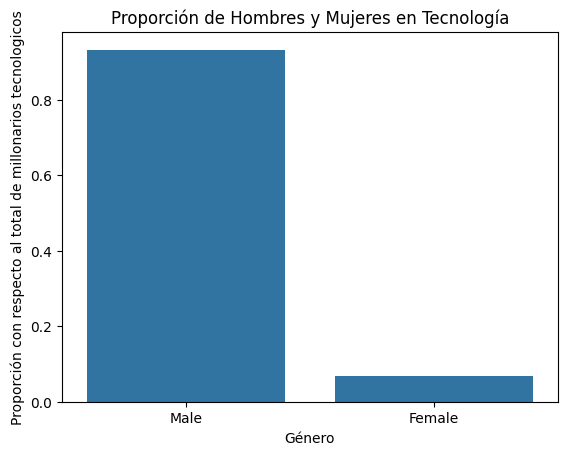

In [ ]:
# Filtra los datos para incluir solo la categoría 'Tecnología'
filtro_tecnologia = forbes_sin_duplicados[forbes_sin_duplicados['business_category'] == 'Technology']
# Finalmente, eliminare los NULL que califique anteriormente como indeterminados, que solo falsean las graficas
filtro_tecnologia = filtro_tecnologia.loc[filtro_tecnologia['gender'] != 'INDETERMINADO']

# Calculamos la proporción de hombres y mujeres en tecnología
proporcion_por_genero = filtro_tecnologia['gender'].value_counts(normalize=True)

# Crea un gráfico de barras
sns.barplot(x=proporcion_por_genero.index, y=proporcion_por_genero.values)

# Personaliza el gráfico
plt.title("Proporción de Hombres y Mujeres en Tecnología")
plt.xlabel("Género")
plt.ylabel("Proporción con respecto al total de millonarios tecnologicos")

plt.show()

# Como nos esperabamos, el porcentaje TOTAL de hombres en tecnologia es mucho mayor que el de mujeres, PERO TAMBIEN HAY 
# MUCHOS MAS MILMILLONARIOS EN LA LISTA FORBES MASCULINOS QUE FEMENINOS.
# COMO ULTIMA REVISION, VEREMOS QUE PORCENTAJE DE HOMBRES DE LOS QUE SON MILLONARIOS HAN INVERTIDO EN TECNOLOGIA
# Y QUE PORCENTAJE DE MUJERES.

In [ ]:
# Contar el número de mujeres tecnológicas, NOS VALEMOS DEL FILTRO HECHO ANTERIORMENTE PARA SOLO LAS MUJERES
cantidad_tecnologicas = len(mujeres_millonarias[mujeres_millonarias.business_category == 'Technology'])
total_millonarias = len(mujeres_millonarias)

# Crear un DataFrame con la información
nuevas_mujeres = {'Categoría': ['Tecnológicas', 'Otras'],
        'Cantidad': [cantidad_tecnologicas, total_millonarias - cantidad_tecnologicas]}

tecnologic_woman = pd.DataFrame(nuevas_mujeres)

# Crear la visualización de barras
fig = px.bar(tecnologic_woman, x='Categoría', y='Cantidad',
             labels={'Cantidad': 'Cantidad de Mujeres'},
             title='Proporción de Mujeres Tecnológicas entre Mujeres Millonarias')

fig.show()

# 53 mujeres de 450 MILLONARIAS invirtieron en tecnologia, UN 11,7 POR CIENTO.

In [ ]:
# Y AHORA, LO MISMO PERO CON LOS HOMBRES 
# PRIMERO CREAMOS EL FILTRO, QUE EL DE HOMBRES NO LO TENEMOS AUN
hombres_millonarios = forbes_sin_duplicados[forbes_sin_duplicados['gender'] == 'Male']
cantidad_tecnologicos = len(hombres_millonarios[hombres_millonarios.business_category == 'Technology'])
total_millonarios = len(hombres_millonarios)

# Crear un DataFrame con la información
nuevos_tecnologicos = {'Categoría': ['Tecnológicos', 'Otros'],
        'Cantidad': [cantidad_tecnologicos, total_millonarios - cantidad_tecnologicos]}

final_hombres = pd.DataFrame(nuevos_tecnologicos)

# Crear la visualización de barras
fig = px.bar(final_hombres, x='Categoría', y='Cantidad',
             labels={'Cantidad': 'Cantidad de Hombres'},
             title='Proporción de Hombres Tecnológicos entre Hombres Millonarios')

fig.show()

#  731 hombres de 3215 MILLONARIOS invirtieron en tecnologia, un 22,73 por ciento.
# DE MODO QUE SE CONFIRMA LA HIPOTESIS PRINCIPAL, Y LOS HOMBRES SE HACEN RICOS CON LA TECNOLOGIA MÁS QUE LAS MUJERES